In [1]:
import boto3
import pandas as pd
from io import StringIO

# Define your bucket name and file key (file path in S3)
BUCKET_NAME = "blue-blood-data"
FILE_KEY = "BigQuery Blue Blood DB Data.csv"  # Change to your actual file path in S3

# Create an S3 client
s3 = boto3.client("s3")

# Fetch the file from S3
response = s3.get_object(Bucket=BUCKET_NAME, Key=FILE_KEY)

# Read the CSV file into a pandas DataFrame
csv_content = response["Body"].read().decode("utf-8")
df = pd.read_csv(StringIO(csv_content))

# Print DataFrame
print(df.head())

   subject_id   prescription_start     prescription_drug  \
0       10013  2125-10-05T00:00:00     Phenylephrine HCl   
1       10013  2125-10-05T00:00:00           Vasopressin   
2       10013  2125-10-05T00:00:00  Iso-Osmotic Dextrose   
3       10013  2125-10-05T00:00:00            Dobutamine   
4       10013  2125-10-05T00:00:00               Aspirin   

  prescription_dose_val_rx prescription_dose_unit_rx        pre_charttime  \
0                       60                        mg  2125-10-04T23:59:00   
1                      100                      UNIT  2125-10-04T23:59:00   
2                       50                        ml  2125-10-04T23:59:00   
3                      250                        mg  2125-10-04T23:59:00   
4                      325                        mg  2125-10-04T23:59:00   

   pre_ph  pre_pco2  pre_po2  pre_bicarbonate  ...  post_fio2_chartevents  \
0     7.3      63.0     60.0              NaN  ...              60.000002   
1     7.3      63.0   

In [2]:
df 

,subject_id,prescription_start,prescription_drug,prescription_dose_val_rx,prescription_dose_unit_rx,pre_charttime,pre_ph,pre_pco2,pre_po2,pre_bicarbonate,...,post_fio2_chartevents,post_aado2_calc,post_pao2fio2,post_temperature,post_fio2,post_aado2,post_carboxyhemoglobin,post_methemoglobin,post_calcium,post_intubated
0,10013,2125-10-05T00:00:00,Phenylephrine HCl,60,mg,2125-10-04T23:59:00,7.30,63.0,60.0,NaN,...,60.000002,231.550017,191.666659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10013,2125-10-05T00:00:00,Vasopressin,100,UNIT,2125-10-04T23:59:00,7.30,63.0,60.0,NaN,...,60.000002,231.550017,191.666659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10013,2125-10-05T00:00:00,Iso-Osmotic Dextrose,50,ml,2125-10-04T23:59:00,7.30,63.0,60.0,NaN,...,60.000002,231.550017,191.666659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10013,2125-10-05T00:00:00,Dobutamine,250,mg,2125-10-04T23:59:00,7.30,63.0,60.0,NaN,...,60.000002,231.550017,191.666659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10013,2125-10-05T00:00:00,Aspirin,325,mg,2125-10-04T23:59:00,7.30,63.0,60.0,NaN,...,60.000002,231.550017,191.666659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,44212,2123-11-25T00:00:00,Vancomycin,500,mg,2123-11-24T21:56:00,7.24,48.0,76.0,NaN,...,80.000000,343.900000,198.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,44212,2123-11-25T00:00:00,0.9% Sodium Chloride,100,mL,2123-11-24T21:56:00,7.24,48.0,76.0,NaN,...,80.000000,343.900000,198.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,44212,2123-11-25T00:00:00,Piperacillin-Tazobactam Na,2.25,g,2123-11-24T21:56:00,7.24,48.0,76.0,NaN,...,80.000000,343.900000,198.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2180,44212,2123-11-25T00:00:00,Prismasate (B22 K4),5000,mL,2123-11-24T21:56:00,7.24,48.0,76.0,NaN,...,80.000000,343.900000,198.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import pandas as pd
import numpy as np

# Print values of columns that start with 'pre_' or 'post_'
'''for col in df.columns:
    if col.startswith("pre_") or col.startswith("post_"):
        print(f"Column: {col}")
        print(df[col])'''
for col in df.select_dtypes(include=[np.number]).columns:
    if (df[col] < 0).any():
        print(f"Column '{col}' contains negative values.", df[col].values.min())


Column 'pre_baseexcess' contains negative values. -16.0
Column 'post_baseexcess' contains negative values. -17.0


In [4]:
import pandas as pd
import numpy as np

# Create a new DataFrame with columns starting with 'pre_' or 'post_'
filtered_df = df.loc[:, df.columns.str.startswith(('pre_', 'post_'))]

# Replace NaN values with -200 in the filtered DataFrame
filtered_df = filtered_df.fillna(-200)

# Show the resulting DataFrame
print(filtered_df)


            pre_charttime  pre_ph  pre_pco2  pre_po2  pre_bicarbonate  \
0     2125-10-04T23:59:00    7.30      63.0     60.0           -200.0   
1     2125-10-04T23:59:00    7.30      63.0     60.0           -200.0   
2     2125-10-04T23:59:00    7.30      63.0     60.0           -200.0   
3     2125-10-04T23:59:00    7.30      63.0     60.0           -200.0   
4     2125-10-04T23:59:00    7.30      63.0     60.0           -200.0   
...                   ...     ...       ...      ...              ...   
2177  2123-11-24T21:56:00    7.24      48.0     76.0           -200.0   
2178  2123-11-24T21:56:00    7.24      48.0     76.0           -200.0   
2179  2123-11-24T21:56:00    7.24      48.0     76.0           -200.0   
2180  2123-11-24T21:56:00    7.24      48.0     76.0           -200.0   
2181  2123-11-24T21:56:00    7.24      48.0     76.0           -200.0   

      pre_baseexcess  pre_totalco2  pre_hematocrit  pre_hemoglobin  \
0                2.0          32.0          -200.0   

In [5]:
import pandas as pd
import numpy as np

# Check and print columns that contain NaN values
for col in df.columns:
    if df[col].isna().any():  # Check if there are any NaN values in the column
        print(f"Column: {col}")
        print(df[col])

Column: pre_bicarbonate
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2177   NaN
2178   NaN
2179   NaN
2180   NaN
2181   NaN
Name: pre_bicarbonate, Length: 2182, dtype: float64
Column: pre_hematocrit
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2177   NaN
2178   NaN
2179   NaN
2180   NaN
2181   NaN
Name: pre_hematocrit, Length: 2182, dtype: float64
Column: pre_hemoglobin
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2177   NaN
2178   NaN
2179   NaN
2180   NaN
2181   NaN
Name: pre_hemoglobin, Length: 2182, dtype: float64
Column: pre_sodium
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2177   NaN
2178   NaN
2179   NaN
2180   NaN
2181   NaN
Name: pre_sodium, Length: 2182, dtype: float64
Column: pre_potassium
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2177   NaN
2178   NaN
2179   NaN
2180   NaN
2181   NaN
Name: pre_potassium, Length: 2182, dtype: float64
Column: pre_chloride
0      NaN
1

In [6]:
import pandas as pd
import numpy as np

# Select columns that start with 'pre_' or 'post_'
selected_columns = df.loc[:, df.columns.str.startswith(('pre_', 'post_'))]

# Ensure that we only work with numeric columns
numeric_selected_columns = selected_columns.select_dtypes(include=[np.number])

# Find the maximum value across all numeric values in the selected columns (ignoring NaN values)
max_value = numeric_selected_columns.max().max()

# Now, divide only the numeric values in the selected columns by the max_value
df.loc[:, numeric_selected_columns.columns] = numeric_selected_columns / max_value

# Show the resulting DataFrame
print(df)


      subject_id   prescription_start           prescription_drug  \
0          10013  2125-10-05T00:00:00           Phenylephrine HCl   
1          10013  2125-10-05T00:00:00                 Vasopressin   
2          10013  2125-10-05T00:00:00        Iso-Osmotic Dextrose   
3          10013  2125-10-05T00:00:00                  Dobutamine   
4          10013  2125-10-05T00:00:00                     Aspirin   
...          ...                  ...                         ...   
2177       44212  2123-11-25T00:00:00                  Vancomycin   
2178       44212  2123-11-25T00:00:00        0.9% Sodium Chloride   
2179       44212  2123-11-25T00:00:00  Piperacillin-Tazobactam Na   
2180       44212  2123-11-25T00:00:00         Prismasate (B22 K4)   
2181       44212  2123-11-25T00:00:00        Iso-Osmotic Dextrose   

     prescription_dose_val_rx prescription_dose_unit_rx        pre_charttime  \
0                          60                        mg  2125-10-04T23:59:00   
1          

In [7]:
filtered_df

,pre_charttime,pre_ph,pre_pco2,pre_po2,pre_bicarbonate,pre_baseexcess,pre_totalco2,pre_hematocrit,pre_hemoglobin,pre_sodium,...,post_fio2_chartevents,post_aado2_calc,post_pao2fio2,post_temperature,post_fio2,post_aado2,post_carboxyhemoglobin,post_methemoglobin,post_calcium,post_intubated
0,2125-10-04T23:59:00,7.30,63.0,60.0,-200.0,2.0,32.0,-200.0,-200.0,-200.0,...,60.000002,231.550017,191.666659,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
1,2125-10-04T23:59:00,7.30,63.0,60.0,-200.0,2.0,32.0,-200.0,-200.0,-200.0,...,60.000002,231.550017,191.666659,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
2,2125-10-04T23:59:00,7.30,63.0,60.0,-200.0,2.0,32.0,-200.0,-200.0,-200.0,...,60.000002,231.550017,191.666659,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
3,2125-10-04T23:59:00,7.30,63.0,60.0,-200.0,2.0,32.0,-200.0,-200.0,-200.0,...,60.000002,231.550017,191.666659,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
4,2125-10-04T23:59:00,7.30,63.0,60.0,-200.0,2.0,32.0,-200.0,-200.0,-200.0,...,60.000002,231.550017,191.666659,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2123-11-24T21:56:00,7.24,48.0,76.0,-200.0,-6.0,22.0,-200.0,-200.0,-200.0,...,80.000000,343.900000,198.750000,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
2178,2123-11-24T21:56:00,7.24,48.0,76.0,-200.0,-6.0,22.0,-200.0,-200.0,-200.0,...,80.000000,343.900000,198.750000,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
2179,2123-11-24T21:56:00,7.24,48.0,76.0,-200.0,-6.0,22.0,-200.0,-200.0,-200.0,...,80.000000,343.900000,198.750000,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
2180,2123-11-24T21:56:00,7.24,48.0,76.0,-200.0,-6.0,22.0,-200.0,-200.0,-200.0,...,80.000000,343.900000,198.750000,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0


In [8]:
filtered_df = filtered_df.drop(columns=['pre_charttime', 'post_charttime'],axis=1)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

ndArray = scaler.fit_transform(filtered_df)

In [10]:
df_scaled = pd.DataFrame(ndArray, columns = filtered_df.columns)

df_scaled

df_scaled.to_csv("blood.csv")

##Variables to remember
df contains the data before preprocessing
filtered_data contains -200 in the place of NULL values
df_scaled has the scaled data

281 x 50 columns

In [11]:
import ctgan

/opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [12]:
import sagemaker
import boto3
from sagemaker.pytorch import PyTorch
import os

boto_session = boto3.Session(region_name='us-east-1')
sagemaker_session = sagemaker.Session(boto_session=boto_session)

role = "arn:aws:iam::211125439249:role/service-role/AmazonSageMaker-ExecutionRole-20250314T153928"

/opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


[04/06/25 19:50:52] INFO     Found credentials in shared credentials file: ~/.aws/credentials   ]8;id=565527;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=236680;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/botocore/credentials.py#1278\1278]8;;\

sagemaker.config INFO - Not applying SDK defaults from location: /Library/Application Support/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /Users/poojasrisundaresan/Library/Application Support/sagemaker/config.yaml


[04/06/25 19:50:53] INFO     Found credentials in shared credentials file: ~/.aws/credentials   ]8;id=152932;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=948429;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/botocore/credentials.py#1278\1278]8;;\

In [13]:
import argparse
import os
import pandas as pd
import numpy as np
import joblib
from ctgan import CTGAN

parser = argparse.ArgumentParser()
parser.add_argument('--epochs', type=int, default=300)
parser.add_argument('--batch-size', type=int, default=500)
parser.add_argument('--output-data-dir', type=str, default=os.environ.get('SM_OUTPUT_DATA_DIR', './output'))
parser.add_argument('--model-dir', type=str, default=os.environ.get('SM_MODEL_DIR', './model'))
parser.add_argument('--train', type=str, default=os.environ.get('SM_CHANNEL_TRAIN', ''))

args, unknown = parser.parse_known_args()

print(f"Args: {args}")

train_file = os.path.join(args.train, 'blood.csv')
print(f"Reading training data from: {train_file}")

data = pd.read_csv(train_file)
data = data.fillna(0)

model = CTGAN(
    epochs=args.epochs,
    batch_size=args.batch_size,
    verbose=True
)

print("Training CTGAN...")
model.fit(data)
print("Training completed.")

synthetic_data = model.sample(100)

print("Synthetic data sample:")
print(synthetic_data.head())

os.makedirs(args.output_data_dir, exist_ok=True)

output_file = os.path.join(args.output_data_dir, 'synthetic_data.csv')
synthetic_data.to_csv(output_file, index=False)
print(f"Synthetic data saved to: {output_file}")


Args: Namespace(epochs=300, batch_size=500, output_data_dir='./output', model_dir='./model', train='')
Reading training data from: blood.csv
Training CTGAN...


                    INFO     Guidance: There are no missing values in column Unnamed: 0. Extra column   ]8;id=388190;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=136953;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             not created.                                                                          

                    INFO     Guidance: There are no missing values in column pre_ph. Extra column not   ]8;id=864302;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=745142;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             created.                                                                              

                    INFO     Guidance: There are no missing values in column pre_pco2. Extra column not ]8;id=317011;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=838954;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             created.                                                                              

                    INFO     Guidance: There are no missing values in column pre_po2. Extra column not  ]8;id=82163;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=298228;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             created.                                                                              

                    INFO     Guidance: There are no missing values in column pre_bicarbonate. Extra     ]8;id=768472;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=919330;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             column not created.                                                                   

                    INFO     Guidance: There are no missing values in column pre_baseexcess. Extra      ]8;id=398388;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=601082;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             column not created.                                                                   

                    INFO     Guidance: There are no missing values in column pre_totalco2. Extra column ]8;id=813817;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=47471;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             not created.                                                                          

                    INFO     Guidance: There are no missing values in column pre_hematocrit. Extra      ]8;id=941567;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=604722;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             column not created.                                                                   

                    INFO     Guidance: There are no missing values in column pre_hemoglobin. Extra      ]8;id=544371;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=680343;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             column not created.                                                                   

                    INFO     Guidance: There are no missing values in column pre_sodium. Extra column   ]8;id=862001;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=603827;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             not created.                                                                          

                    INFO     Guidance: There are no missing values in column pre_potassium. Extra       ]8;id=880899;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=768204;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             column not created.                                                                   

[04/06/25 19:50:54] INFO     Guidance: There are no missing values in column pre_chloride. Extra column ]8;id=43063;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=261812;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             not created.                                                                          

                    INFO     Guidance: There are no missing values in column pre_glucose. Extra column  ]8;id=67691;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=177564;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             not created.                                                                          

                    INFO     Guidance: There are no missing values in column pre_lactate. Extra column  ]8;id=966986;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=856613;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             not created.                                                                          

                    INFO     Guidance: There are no missing values in column pre_so2. Extra column not  ]8;id=422933;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=588161;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             created.                                                                              

                    INFO     Guidance: There are no missing values in column pre_spo2. Extra column not ]8;id=9453;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=91794;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             created.                                                                              

                    INFO     Guidance: There are no missing values in column pre_fio2_chartevents.      ]8;id=933102;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=18313;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             Extra column not created.                                                             

                    INFO     Guidance: There are no missing values in column pre_aado2_calc. Extra      ]8;id=921234;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=994468;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             column not created.                                                                   

                    INFO     Guidance: There are no missing values in column pre_pao2fio2. Extra column ]8;id=315488;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=998545;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             not created.                                                                          

                    INFO     Guidance: There are no missing values in column pre_temperature. Extra     ]8;id=152687;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=917297;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             column not created.                                                                   

                    INFO     Guidance: There are no missing values in column pre_fio2. Extra column not ]8;id=718126;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=533306;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             created.                                                                              

                    INFO     Guidance: There are no missing values in column pre_aado2. Extra column    ]8;id=281730;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=754441;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             not created.                                                                          

                    INFO     Guidance: There are no missing values in column pre_carboxyhemoglobin.     ]8;id=268645;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=702261;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             Extra column not created.                                                             

                    INFO     Guidance: There are no missing values in column pre_methemoglobin. Extra   ]8;id=609093;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=871128;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             column not created.                                                                   

                    INFO     Guidance: There are no missing values in column pre_calcium. Extra column  ]8;id=878867;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=421537;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             not created.                                                                          

                    INFO     Guidance: There are no missing values in column pre_intubated. Extra       ]8;id=811092;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=228893;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             column not created.                                                                   

                    INFO     Guidance: There are no missing values in column post_ph. Extra column not  ]8;id=436482;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=34991;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             created.                                                                              

                    INFO     Guidance: There are no missing values in column post_pco2. Extra column    ]8;id=858225;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=989914;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             not created.                                                                          

                    INFO     Guidance: There are no missing values in column post_po2. Extra column not ]8;id=370823;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=953110;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             created.                                                                              

                    INFO     Guidance: There are no missing values in column post_bicarbonate. Extra    ]8;id=992291;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=207663;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             column not created.                                                                   

                    INFO     Guidance: There are no missing values in column post_baseexcess. Extra     ]8;id=996158;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=868426;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             column not created.                                                                   

                    INFO     Guidance: There are no missing values in column post_totalco2. Extra       ]8;id=640196;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=959271;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             column not created.                                                                   

                    INFO     Guidance: There are no missing values in column post_hematocrit. Extra     ]8;id=208647;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=963514;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             column not created.                                                                   

                    INFO     Guidance: There are no missing values in column post_hemoglobin. Extra     ]8;id=35507;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=377997;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             column not created.                                                                   

                    INFO     Guidance: There are no missing values in column post_sodium. Extra column  ]8;id=153026;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=818460;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             not created.                                                                          

                    INFO     Guidance: There are no missing values in column post_potassium. Extra      ]8;id=633992;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=971683;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             column not created.                                                                   

                    INFO     Guidance: There are no missing values in column post_chloride. Extra       ]8;id=914915;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=752581;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             column not created.                                                                   

                    INFO     Guidance: There are no missing values in column post_glucose. Extra column ]8;id=341663;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=513306;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             not created.                                                                          

                    INFO     Guidance: There are no missing values in column post_lactate. Extra column ]8;id=471904;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=646756;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             not created.                                                                          

                    INFO     Guidance: There are no missing values in column post_so2. Extra column not ]8;id=351604;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=955480;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             created.                                                                              

                    INFO     Guidance: There are no missing values in column post_spo2. Extra column    ]8;id=456476;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=597900;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             not created.                                                                          

                    INFO     Guidance: There are no missing values in column post_fio2_chartevents.     ]8;id=92686;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=679095;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             Extra column not created.                                                             

                    INFO     Guidance: There are no missing values in column post_aado2_calc. Extra     ]8;id=366715;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=719254;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             column not created.                                                                   

                    INFO     Guidance: There are no missing values in column post_pao2fio2. Extra       ]8;id=104379;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=785774;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             column not created.                                                                   

                    INFO     Guidance: There are no missing values in column post_temperature. Extra    ]8;id=793406;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=834994;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             column not created.                                                                   

                    INFO     Guidance: There are no missing values in column post_fio2. Extra column    ]8;id=83118;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=700330;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             not created.                                                                          

                    INFO     Guidance: There are no missing values in column post_aado2. Extra column   ]8;id=440465;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=782954;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             not created.                                                                          

                    INFO     Guidance: There are no missing values in column post_carboxyhemoglobin.    ]8;id=641087;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=950249;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             Extra column not created.                                                             

                    INFO     Guidance: There are no missing values in column post_methemoglobin. Extra  ]8;id=82806;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=583856;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             column not created.                                                                   

                    INFO     Guidance: There are no missing values in column post_calcium. Extra column ]8;id=346643;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=922949;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             not created.                                                                          

                    INFO     Guidance: There are no missing values in column post_intubated. Extra      ]8;id=669592;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py\null.py]8;;\:]8;id=639892;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/rdt/transformers/null.py#119\119]8;;\
                             column not created.                                                                   

/opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
/opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
/opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
/opt/anaconda3/e

Training completed.
Synthetic data sample:
   Unnamed: 0    pre_ph  pre_pco2   pre_po2  pre_bicarbonate  pre_baseexcess  \
0        1385  0.594785  0.531869  0.137452         0.000622        0.486775   
1         313  0.583081  0.689501  0.097341        -0.000885        0.500574   
2        1534  0.585860  0.550570  0.151527        -0.000579        0.486226   
3        1100  0.619400  0.162029  0.112316         0.002652        0.477458   
4        1486  0.577300  0.418795  0.037880        -0.001674        0.476576   

   pre_totalco2  pre_hematocrit  pre_hemoglobin  pre_sodium  ...  \
0      0.309208       -0.007738        0.002107   -0.006205  ...   
1      0.263565        0.009471        0.004320   -0.004227  ...   
2      0.524328        0.006119       -0.010071   -0.008280  ...   
3      0.468975        0.000221       -0.002441    0.001849  ...   
4      0.549022        0.000081        0.004806    0.009090  ...   

   post_fio2_chartevents  post_aado2_calc  post_pao2fio2  post_temp

In [14]:
df

,subject_id,prescription_start,prescription_drug,prescription_dose_val_rx,prescription_dose_unit_rx,pre_charttime,pre_ph,pre_pco2,pre_po2,pre_bicarbonate,...,post_fio2_chartevents,post_aado2_calc,post_pao2fio2,post_temperature,post_fio2,post_aado2,post_carboxyhemoglobin,post_methemoglobin,post_calcium,post_intubated
0,10013,2125-10-05T00:00:00,Phenylephrine HCl,60,mg,2125-10-04T23:59:00,0.011514,0.099369,0.094637,NaN,...,0.094637,0.365221,0.302313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10013,2125-10-05T00:00:00,Vasopressin,100,UNIT,2125-10-04T23:59:00,0.011514,0.099369,0.094637,NaN,...,0.094637,0.365221,0.302313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10013,2125-10-05T00:00:00,Iso-Osmotic Dextrose,50,ml,2125-10-04T23:59:00,0.011514,0.099369,0.094637,NaN,...,0.094637,0.365221,0.302313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10013,2125-10-05T00:00:00,Dobutamine,250,mg,2125-10-04T23:59:00,0.011514,0.099369,0.094637,NaN,...,0.094637,0.365221,0.302313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10013,2125-10-05T00:00:00,Aspirin,325,mg,2125-10-04T23:59:00,0.011514,0.099369,0.094637,NaN,...,0.094637,0.365221,0.302313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,44212,2123-11-25T00:00:00,Vancomycin,500,mg,2123-11-24T21:56:00,0.011420,0.075710,0.119874,NaN,...,0.126183,0.542429,0.313486,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,44212,2123-11-25T00:00:00,0.9% Sodium Chloride,100,mL,2123-11-24T21:56:00,0.011420,0.075710,0.119874,NaN,...,0.126183,0.542429,0.313486,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,44212,2123-11-25T00:00:00,Piperacillin-Tazobactam Na,2.25,g,2123-11-24T21:56:00,0.011420,0.075710,0.119874,NaN,...,0.126183,0.542429,0.313486,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2180,44212,2123-11-25T00:00:00,Prismasate (B22 K4),5000,mL,2123-11-24T21:56:00,0.011420,0.075710,0.119874,NaN,...,0.126183,0.542429,0.313486,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df = pd.read_csv('final_df.csv')

df

,subject_id,prescription_start,prescription_rx_embeddings,prescription_dose_val_rx,prescription_dose_unit_rx,pre_charttime,pre_ph,pre_pco2,pre_po2,pre_bicarbonate,...,post_fio2_chartevents,post_aado2_calc,post_pao2fio2,post_temperature,post_fio2,post_aado2,post_carboxyhemoglobin,post_methemoglobin,post_calcium,post_intubated
0,10013,2125-10-05T00:00:00,[ 3.5185558e-01 1.2351961e-01 -1.2304356e-01 ...,0.010317,0,2125-10-04T23:59:00,0.500,0.741935,0.023018,0.0,...,0.866667,0.527567,0.548553,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10013,2125-10-05T00:00:00,[ 0.45182744 0.3218944 -0.5210766 0.315588...,0.011905,12,2125-10-04T23:59:00,0.500,0.741935,0.023018,0.0,...,0.866667,0.527567,0.548553,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10013,2125-10-05T00:00:00,[ 4.5976555e-01 1.9232908e-01 -5.7382131e-01 ...,0.009921,11,2125-10-04T23:59:00,0.500,0.741935,0.023018,0.0,...,0.866667,0.527567,0.548553,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10013,2125-10-05T00:00:00,[ 6.26637757e-01 2.61670560e-01 -2.40684357e-...,0.017857,0,2125-10-04T23:59:00,0.500,0.741935,0.023018,0.0,...,0.866667,0.527567,0.548553,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10013,2125-10-05T00:00:00,[ 4.15423244e-01 -1.28793076e-01 -2.01883331e-...,0.020833,0,2125-10-04T23:59:00,0.500,0.741935,0.023018,0.0,...,0.866667,0.527567,0.548553,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,44212,2123-11-25T00:00:00,[ 0.35067722 0.1657952 -0.11939768 0.529637...,0.027778,0,2123-11-24T21:56:00,0.375,0.500000,0.063939,0.0,...,0.933333,0.664914,0.558473,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,44212,2123-11-25T00:00:00,[-1.67207658e+00 6.26857281e-02 -3.97092104e-...,0.011905,11,2123-11-24T21:56:00,0.375,0.500000,0.063939,0.0,...,0.933333,0.664914,0.558473,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,44212,2123-11-25T00:00:00,[ 3.46226931e-01 1.31596521e-01 -3.90895218e-...,0.008026,2,2123-11-24T21:56:00,0.375,0.500000,0.063939,0.0,...,0.933333,0.664914,0.558473,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2180,44212,2123-11-25T00:00:00,[ 0.44693142 0.00798898 -0.14514387 1.489820...,0.206349,11,2123-11-24T21:56:00,0.375,0.500000,0.063939,0.0,...,0.933333,0.664914,0.558473,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df = df.drop(columns = ['subject_id', 'pre_charttime', 'prescription_start', 'post_charttime'], axis = 1)

In [17]:
df

,prescription_rx_embeddings,prescription_dose_val_rx,prescription_dose_unit_rx,pre_ph,pre_pco2,pre_po2,pre_bicarbonate,pre_baseexcess,pre_totalco2,pre_hematocrit,...,post_fio2_chartevents,post_aado2_calc,post_pao2fio2,post_temperature,post_fio2,post_aado2,post_carboxyhemoglobin,post_methemoglobin,post_calcium,post_intubated
0,[ 3.5185558e-01 1.2351961e-01 -1.2304356e-01 ...,0.010317,0,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,...,0.866667,0.527567,0.548553,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,[ 0.45182744 0.3218944 -0.5210766 0.315588...,0.011905,12,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,...,0.866667,0.527567,0.548553,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,[ 4.5976555e-01 1.9232908e-01 -5.7382131e-01 ...,0.009921,11,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,...,0.866667,0.527567,0.548553,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,[ 6.26637757e-01 2.61670560e-01 -2.40684357e-...,0.017857,0,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,...,0.866667,0.527567,0.548553,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,[ 4.15423244e-01 -1.28793076e-01 -2.01883331e-...,0.020833,0,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,...,0.866667,0.527567,0.548553,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,[ 0.35067722 0.1657952 -0.11939768 0.529637...,0.027778,0,0.375,0.500000,0.063939,0.0,0.303030,0.324324,0.0,...,0.933333,0.664914,0.558473,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,[-1.67207658e+00 6.26857281e-02 -3.97092104e-...,0.011905,11,0.375,0.500000,0.063939,0.0,0.303030,0.324324,0.0,...,0.933333,0.664914,0.558473,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,[ 3.46226931e-01 1.31596521e-01 -3.90895218e-...,0.008026,2,0.375,0.500000,0.063939,0.0,0.303030,0.324324,0.0,...,0.933333,0.664914,0.558473,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2180,[ 0.44693142 0.00798898 -0.14514387 1.489820...,0.206349,11,0.375,0.500000,0.063939,0.0,0.303030,0.324324,0.0,...,0.933333,0.664914,0.558473,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df.columns

Index(['prescription_rx_embeddings', 'prescription_dose_val_rx',
       'prescription_dose_unit_rx', 'pre_ph', 'pre_pco2', 'pre_po2',
       'pre_bicarbonate', 'pre_baseexcess', 'pre_totalco2', 'pre_hematocrit',
       'pre_hemoglobin', 'pre_sodium', 'pre_potassium', 'pre_chloride',
       'pre_glucose', 'pre_lactate', 'pre_so2', 'pre_spo2',
       'pre_fio2_chartevents', 'pre_aado2_calc', 'pre_pao2fio2',
       'pre_temperature', 'pre_fio2', 'pre_aado2', 'pre_carboxyhemoglobin',
       'pre_methemoglobin', 'pre_calcium', 'pre_intubated', 'post_ph',
       'post_pco2', 'post_po2', 'post_bicarbonate', 'post_baseexcess',
       'post_totalco2', 'post_hematocrit', 'post_hemoglobin', 'post_sodium',
       'post_potassium', 'post_chloride', 'post_glucose', 'post_lactate',
       'post_so2', 'post_spo2', 'post_fio2_chartevents', 'post_aado2_calc',
       'post_pao2fio2', 'post_temperature', 'post_fio2', 'post_aado2',
       'post_carboxyhemoglobin', 'post_methemoglobin', 'post_calcium',
    

In [19]:
df

,prescription_rx_embeddings,prescription_dose_val_rx,prescription_dose_unit_rx,pre_ph,pre_pco2,pre_po2,pre_bicarbonate,pre_baseexcess,pre_totalco2,pre_hematocrit,...,post_fio2_chartevents,post_aado2_calc,post_pao2fio2,post_temperature,post_fio2,post_aado2,post_carboxyhemoglobin,post_methemoglobin,post_calcium,post_intubated
0,[ 3.5185558e-01 1.2351961e-01 -1.2304356e-01 ...,0.010317,0,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,...,0.866667,0.527567,0.548553,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,[ 0.45182744 0.3218944 -0.5210766 0.315588...,0.011905,12,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,...,0.866667,0.527567,0.548553,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,[ 4.5976555e-01 1.9232908e-01 -5.7382131e-01 ...,0.009921,11,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,...,0.866667,0.527567,0.548553,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,[ 6.26637757e-01 2.61670560e-01 -2.40684357e-...,0.017857,0,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,...,0.866667,0.527567,0.548553,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,[ 4.15423244e-01 -1.28793076e-01 -2.01883331e-...,0.020833,0,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,...,0.866667,0.527567,0.548553,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,[ 0.35067722 0.1657952 -0.11939768 0.529637...,0.027778,0,0.375,0.500000,0.063939,0.0,0.303030,0.324324,0.0,...,0.933333,0.664914,0.558473,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,[-1.67207658e+00 6.26857281e-02 -3.97092104e-...,0.011905,11,0.375,0.500000,0.063939,0.0,0.303030,0.324324,0.0,...,0.933333,0.664914,0.558473,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,[ 3.46226931e-01 1.31596521e-01 -3.90895218e-...,0.008026,2,0.375,0.500000,0.063939,0.0,0.303030,0.324324,0.0,...,0.933333,0.664914,0.558473,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2180,[ 0.44693142 0.00798898 -0.14514387 1.489820...,0.206349,11,0.375,0.500000,0.063939,0.0,0.303030,0.324324,0.0,...,0.933333,0.664914,0.558473,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Converting string vector to numpy array

clean_convert splits the values and converts it to a numpy vector

In [20]:
import pandas as pd
import numpy as np
import re

def clean_and_convert(x):
    if pd.notna(x):
        try:
            # Remove square brackets if they exist
            x = re.sub(r'[\[\]]', '', x)
            # Replace multiple spaces with a single space
            cleaned = re.sub(r'\s+', ' ', x.strip())
            # Convert to numpy array of floats
            return np.array([float(i) for i in cleaned.split(' ')])
        except Exception as e:
            # If there's an error during conversion, print the error and return the original value
            print(f"Error processing value: {x}. Error: {e}")
            return x  # Return the original value in case of error
    return x  # If NaN, return as is

# Check the values before applying the function
print(df['prescription_rx_embeddings'].head())

# Apply the function to the 'prescription_rx_embeddings' column
df['prescription_rx_embeddings'] = df['prescription_rx_embeddings'].apply(clean_and_convert)

# Check the result
print(df['prescription_rx_embeddings'].head())


0    [ 3.5185558e-01  1.2351961e-01 -1.2304356e-01 ...
1    [ 0.45182744  0.3218944  -0.5210766   0.315588...
2    [ 4.5976555e-01  1.9232908e-01 -5.7382131e-01 ...
3    [ 6.26637757e-01  2.61670560e-01 -2.40684357e-...
4    [ 4.15423244e-01 -1.28793076e-01 -2.01883331e-...
Name: prescription_rx_embeddings, dtype: object
0    [0.35185558, 0.12351961, -0.12304356, -0.33200...
1    [0.45182744, 0.3218944, -0.5210766, 0.3155888,...
2    [0.45976555, 0.19232908, -0.57382131, 1.349748...
3    [0.626637757, 0.26167056, -0.0240684357, 0.163...
4    [0.415423244, -0.128793076, -0.201883331, 0.05...
Name: prescription_rx_embeddings, dtype: object


In [21]:
df

,prescription_rx_embeddings,prescription_dose_val_rx,prescription_dose_unit_rx,pre_ph,pre_pco2,pre_po2,pre_bicarbonate,pre_baseexcess,pre_totalco2,pre_hematocrit,...,post_fio2_chartevents,post_aado2_calc,post_pao2fio2,post_temperature,post_fio2,post_aado2,post_carboxyhemoglobin,post_methemoglobin,post_calcium,post_intubated
0,"[0.35185558, 0.12351961, -0.12304356, -0.33200...",0.010317,0,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,...,0.866667,0.527567,0.548553,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"[0.45182744, 0.3218944, -0.5210766, 0.3155888,...",0.011905,12,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,...,0.866667,0.527567,0.548553,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"[0.45976555, 0.19232908, -0.57382131, 1.349748...",0.009921,11,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,...,0.866667,0.527567,0.548553,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"[0.626637757, 0.26167056, -0.0240684357, 0.163...",0.017857,0,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,...,0.866667,0.527567,0.548553,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"[0.415423244, -0.128793076, -0.201883331, 0.05...",0.020833,0,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,...,0.866667,0.527567,0.548553,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,"[0.35067722, 0.1657952, -0.11939768, 0.5296372...",0.027778,0,0.375,0.500000,0.063939,0.0,0.303030,0.324324,0.0,...,0.933333,0.664914,0.558473,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,"[-1.67207658, 0.0626857281, -0.397092104, -3.6...",0.011905,11,0.375,0.500000,0.063939,0.0,0.303030,0.324324,0.0,...,0.933333,0.664914,0.558473,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,"[0.346226931, 0.131596521, -0.390895218, 0.683...",0.008026,2,0.375,0.500000,0.063939,0.0,0.303030,0.324324,0.0,...,0.933333,0.664914,0.558473,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2180,"[0.44693142, 0.00798898, -0.14514387, 1.489820...",0.206349,11,0.375,0.500000,0.063939,0.0,0.303030,0.324324,0.0,...,0.933333,0.664914,0.558473,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Converting each element in the numpy array into a column

expanded_columns is a new dataframe with a list of each element in prescription_rx_embeddings numpy array

df.concat uses the expanded_columns

In [22]:
# Split the 'prescription_rx_embeddings' column into separate columns based on array elements
expanded_columns = pd.DataFrame(df['prescription_rx_embeddings'].tolist(), index=df.index)

# Optionally, rename the columns to something meaningful
expanded_columns.columns = [f'P{i}' for i in range(expanded_columns.shape[1])]

# Concatenate the expanded columns back to the original DataFrame, if needed
df = pd.concat([df, expanded_columns], axis=1)

# Drop the original 'prescription_rx_embeddings' column
df.drop(columns=['prescription_rx_embeddings'], inplace=True)

df

,prescription_dose_val_rx,prescription_dose_unit_rx,pre_ph,pre_pco2,pre_po2,pre_bicarbonate,pre_baseexcess,pre_totalco2,pre_hematocrit,pre_hemoglobin,...,P118,P119,P120,P121,P122,P123,P124,P125,P126,P127
0,0.010317,0,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,0.0,...,0.922822,0.194803,1.112494,-1.089337,-0.107142,-0.373226,-0.344020,0.328800,0.468490,-1.074432
1,0.011905,12,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,0.0,...,-0.004458,0.169775,-0.623910,0.348464,-0.027639,-0.209535,0.026674,0.787516,0.015712,-0.047965
2,0.009921,11,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,0.0,...,1.064011,-0.545910,1.657069,0.687448,0.182779,-0.156040,1.419005,1.244775,-0.725679,1.402903
3,0.017857,0,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,0.0,...,-0.486838,0.567405,-0.682332,0.124973,0.584291,0.036663,-0.033455,0.139260,0.164953,-0.279221
4,0.020833,0,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,0.0,...,-0.916522,0.936199,-0.727807,0.605511,0.442792,0.379367,0.042976,-0.075874,0.134937,0.000911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.027778,0,0.375,0.500000,0.063939,0.0,0.303030,0.324324,0.0,0.0,...,-0.844219,0.367455,-0.311357,-0.091761,0.238513,-1.155311,-1.137577,-0.644839,-0.607764,-0.205493
2178,0.011905,11,0.375,0.500000,0.063939,0.0,0.303030,0.324324,0.0,0.0,...,-0.449469,0.053109,-1.665534,-0.913456,0.804736,-1.414670,1.473890,1.771188,-2.091106,-1.964736
2179,0.008026,2,0.375,0.500000,0.063939,0.0,0.303030,0.324324,0.0,0.0,...,0.489259,-0.016742,0.511773,-0.010810,0.347862,0.296723,0.206720,0.449563,-0.123249,0.355982
2180,0.206349,11,0.375,0.500000,0.063939,0.0,0.303030,0.324324,0.0,0.0,...,0.143358,-0.577362,0.619785,0.227037,-0.856793,0.058450,-0.497501,-0.359619,-0.426077,0.646584


In [23]:
df

,prescription_dose_val_rx,prescription_dose_unit_rx,pre_ph,pre_pco2,pre_po2,pre_bicarbonate,pre_baseexcess,pre_totalco2,pre_hematocrit,pre_hemoglobin,...,P118,P119,P120,P121,P122,P123,P124,P125,P126,P127
0,0.010317,0,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,0.0,...,0.922822,0.194803,1.112494,-1.089337,-0.107142,-0.373226,-0.344020,0.328800,0.468490,-1.074432
1,0.011905,12,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,0.0,...,-0.004458,0.169775,-0.623910,0.348464,-0.027639,-0.209535,0.026674,0.787516,0.015712,-0.047965
2,0.009921,11,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,0.0,...,1.064011,-0.545910,1.657069,0.687448,0.182779,-0.156040,1.419005,1.244775,-0.725679,1.402903
3,0.017857,0,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,0.0,...,-0.486838,0.567405,-0.682332,0.124973,0.584291,0.036663,-0.033455,0.139260,0.164953,-0.279221
4,0.020833,0,0.500,0.741935,0.023018,0.0,0.545455,0.594595,0.0,0.0,...,-0.916522,0.936199,-0.727807,0.605511,0.442792,0.379367,0.042976,-0.075874,0.134937,0.000911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.027778,0,0.375,0.500000,0.063939,0.0,0.303030,0.324324,0.0,0.0,...,-0.844219,0.367455,-0.311357,-0.091761,0.238513,-1.155311,-1.137577,-0.644839,-0.607764,-0.205493
2178,0.011905,11,0.375,0.500000,0.063939,0.0,0.303030,0.324324,0.0,0.0,...,-0.449469,0.053109,-1.665534,-0.913456,0.804736,-1.414670,1.473890,1.771188,-2.091106,-1.964736
2179,0.008026,2,0.375,0.500000,0.063939,0.0,0.303030,0.324324,0.0,0.0,...,0.489259,-0.016742,0.511773,-0.010810,0.347862,0.296723,0.206720,0.449563,-0.123249,0.355982
2180,0.206349,11,0.375,0.500000,0.063939,0.0,0.303030,0.324324,0.0,0.0,...,0.143358,-0.577362,0.619785,0.227037,-0.856793,0.058450,-0.497501,-0.359619,-0.426077,0.646584


In [25]:
from ctgan import CTGAN


# Setup SageMaker session
import sagemaker
import boto3
from sagemaker.pytorch import PyTorch
import os

boto_session = boto3.Session(region_name='us-east-1')
sagemaker_session = sagemaker.Session(boto_session=boto_session)
role = "arn:aws:iam::211125439249:role/service-role/AmazonSageMaker-ExecutionRole-20250314T153928"
role_name = role.split('/')[-1]  # Extract just the role name from the ARN

# Attach AdministratorAccess policy to your existing role
iam_client = boto3.client('iam')
iam_client.attach_role_policy(
    RoleName=role_name,
    PolicyArn="arn:aws:iam::aws:policy/AdministratorAccess"
)
print(f"Attached AdministratorAccess policy to role: {role}")

# Assume blood.csv is in S3 already - if not, upload it first
input_data_s3_uri = "s3://blue-blood-data/final_df.csv"

# Create a PyTorch estimator
estimator = PyTorch(
    entry_point='train_ctgan.py',  
    role=role,
    framework_version='1.12.0',  
    py_version='py38',
    instance_count=1,
    instance_type='ml.m5.xlarge',
    sagemaker_session=sagemaker_session,
    hyperparameters={
        'epochs': 300,
        'batch-size': 5000
    },
    dependencies=['requirements.txt']  # Add dependencies
)

#put it in a s3 bucket folder, so that you can reference back to it, name it simple, (output ctgan folder)
# with each new run, when testing different hyperparameters - name it with synthetic data-1 or s

# Start training
estimator.fit({'train': input_data_s3_uri})

# After training, you can access the output
output_path = estimator.model_data
print(f"Model artifacts stored at: {output_path}")

[04/06/25 21:14:30] INFO     Found credentials in shared credentials file: ~/.aws/credentials   ]8;id=349600;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=12212;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/botocore/credentials.py#1278\1278]8;;\

Attached AdministratorAccess policy to role: arn:aws:iam::211125439249:role/service-role/AmazonSageMaker-ExecutionRole-20250314T153928


[04/06/25 21:14:31] INFO     SageMaker Python SDK will collect telemetry to help us better  ]8;id=776192;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/sagemaker/telemetry/telemetry_logging.py\telemetry_logging.py]8;;\:]8;id=20917;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/sagemaker/telemetry/telemetry_logging.py#91\91]8;;\
                             understand our user's needs, diagnose issues, and deliver                             
                             additional features.                                                                  
                             To opt out of telemetry, please disable via TelemetryOptOut                           
                             parameter in SDK defaults config. For more information, refer                         
                             to                                                                                    
                             https://sagemaker.readthedocs.io/en/stable/overview.html#confi                        
                             guring-and-using-defaults-with-the-sagemaker-python-sdk.                              

                    INFO     image_uri is not presented, retrieving image_uri based on            ]8;id=427006;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=768041;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/sagemaker/image_uris.py#681\681]8;;\
                             instance_type, framework etc.                                                         

[04/06/25 21:14:33] INFO     image_uri is not presented, retrieving image_uri based on            ]8;id=731642;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=279203;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/sagemaker/image_uris.py#681\681]8;;\
                             instance_type, framework etc.                                                         

                    INFO     Creating training-job with name:                                       ]8;id=812921;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=276596;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/sagemaker/session.py#1042\1042]8;;\
                             pytorch-training-2025-04-07-02-14-31-322                                              

2025-04-07 02:14:34 Starting - Starting the training job...
2025-04-07 02:15:09 Downloading - Downloading input data...
2025-04-07 02:15:29 Downloading - Downloading the training image......
2025-04-07 02:16:20 Training - Training image download completed. Training in progress.bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2025-04-07 02:16:27,849 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2025-04-07 02:16:27,851 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-04-07 02:16:27,860 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2025-04-07 02:16:27,862 sagemaker_pytorch_container.training INFO     Invoking user training script.
2025-04-07 02:16:28,046 sagemaker-training-toolkit INFO     Installing dependencies from requirements.txt:
/opt/conda/bin/python3.8 -m pip install -r requirements.txt
━━━━━━━

In [26]:
import boto3
import tarfile
import os
import pandas as pd
from io import BytesIO


# S3 bucket and key extraction
s3_uri = "s3://sagemaker-us-east-1-211125439249/pytorch-training-2025-03-21-04-33-20-724/output/output.tar.gz"
parts = s3_uri.replace("s3://", "").split("/")
bucket_name = parts[0]
key = "/".join(parts[1:])

# Initialize S3 client
s3 = boto3.client('s3')

# Download the .tar.gz file
response = s3.get_object(Bucket=bucket_name, Key=key)
file_obj = BytesIO(response['Body'].read())

# Extract the .tar.gz file
with tarfile.open(fileobj=file_obj, mode='r:gz') as tar:
    for member in tar.getmembers():
        if "synthetic_data.csv" in member.name:
            csv_file = tar.extractfile(member)
            df_synthetic = pd.read_csv(csv_file)
            break

# Display the DataFrame
df_synthetic

[04/06/25 22:23:56] INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=932297;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=544544;file:///opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

,prescription_dose_val_rx,prescription_dose_unit_rx,pre_ph,pre_pco2,pre_po2,pre_bicarbonate,pre_baseexcess,pre_totalco2,pre_hematocrit,pre_hemoglobin,...,P118,P119,P120,P121,P122,P123,P124,P125,P126,P127
0,0.001414,3,0.714855,0.394011,0.181301,-0.002940,0.476277,0.484996,0.010056,0.007761,...,1.526871,-0.226891,-0.562963,-0.571600,0.833258,-0.366861,-0.101112,-0.138971,0.903566,0.160276
1,-0.008318,3,0.755034,0.665916,0.429736,0.002194,0.486233,0.509745,0.012129,0.011334,...,0.133386,1.487494,-0.317584,1.150079,0.659608,-0.164488,0.520313,1.457416,-0.637841,-0.527525
2,0.009602,3,0.575826,0.604175,0.175497,-0.001985,0.883870,0.472304,0.006683,0.005170,...,0.473507,-0.872985,-0.854821,0.317275,0.736494,-0.236524,0.822562,1.309453,-0.262809,-0.408042
3,0.031796,3,0.568649,0.472849,0.201809,-0.000932,0.500979,0.881549,-0.004801,-0.012761,...,-0.736157,0.231719,-0.220861,0.276359,0.466031,-0.016229,-1.211064,0.497239,0.252757,1.231792
4,0.007656,3,0.463221,0.564624,0.101114,-0.000798,0.474374,0.431181,-0.009773,0.786163,...,-0.351883,1.104538,-1.855656,-0.640339,0.824865,2.791273,-0.193441,-0.803403,0.627992,-0.826140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.033166,3,0.566082,0.562798,0.246193,0.002698,0.482202,0.356896,0.000045,-0.008382,...,-0.529967,0.615780,1.202921,0.235030,-0.947755,-0.191961,1.253938,2.514703,0.283438,-1.773356
96,-0.001568,3,0.590410,0.475273,0.124659,-0.001120,0.486416,0.468453,0.010148,0.003373,...,1.428672,1.073474,-0.063989,-0.611268,-0.244905,-0.312786,-1.532022,-0.607202,-0.461784,-0.002399
97,0.011926,10,0.573495,0.641641,0.419101,-0.000895,0.523242,0.537552,0.003332,0.003079,...,1.188481,1.345886,1.163857,0.419345,-0.363016,0.550361,0.758469,-1.076191,-1.132977,-0.533249
98,0.006822,3,0.586478,0.916336,0.244199,-0.002852,0.347821,0.485628,0.008791,0.004538,...,0.879364,0.368527,1.135426,-0.443087,0.700429,0.198101,0.555337,0.355721,0.574814,-0.118663


## statistical analysis for each column

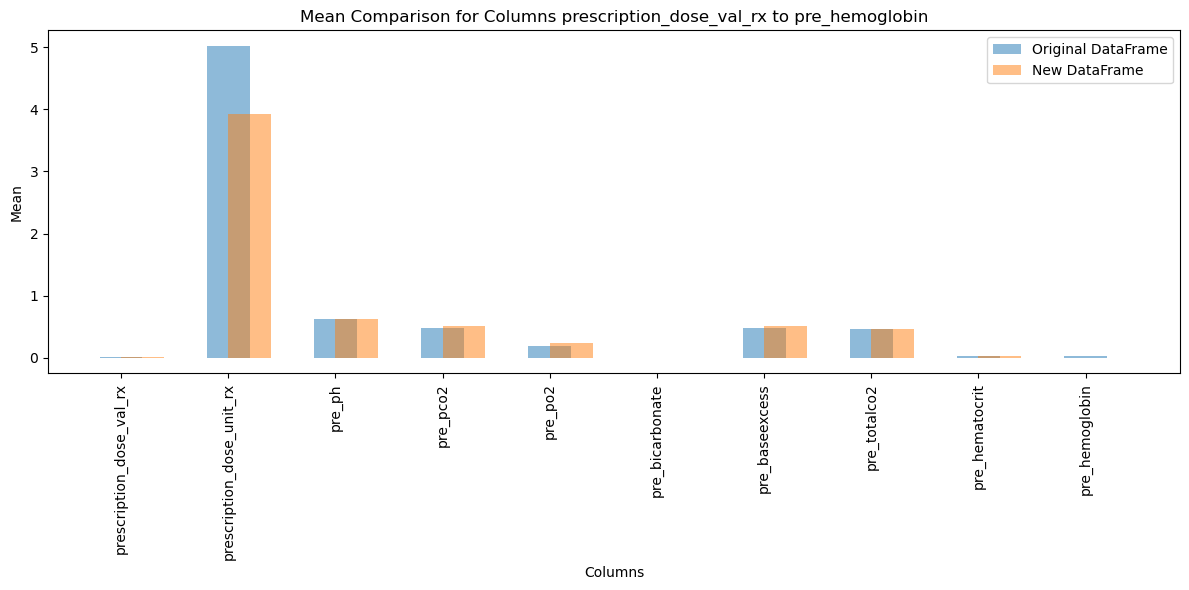

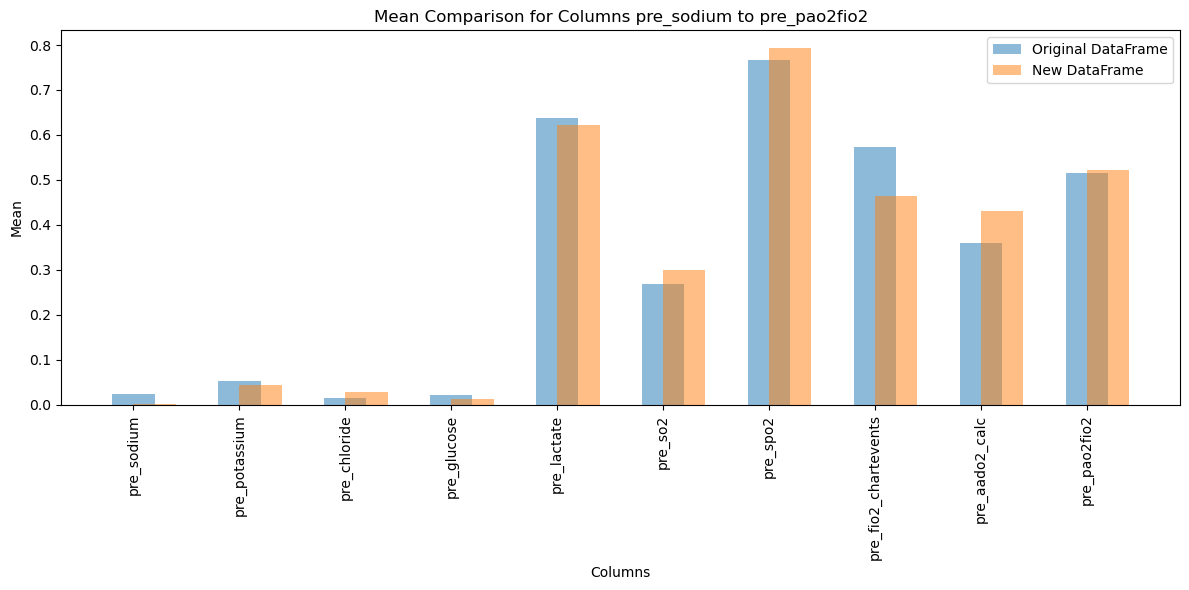

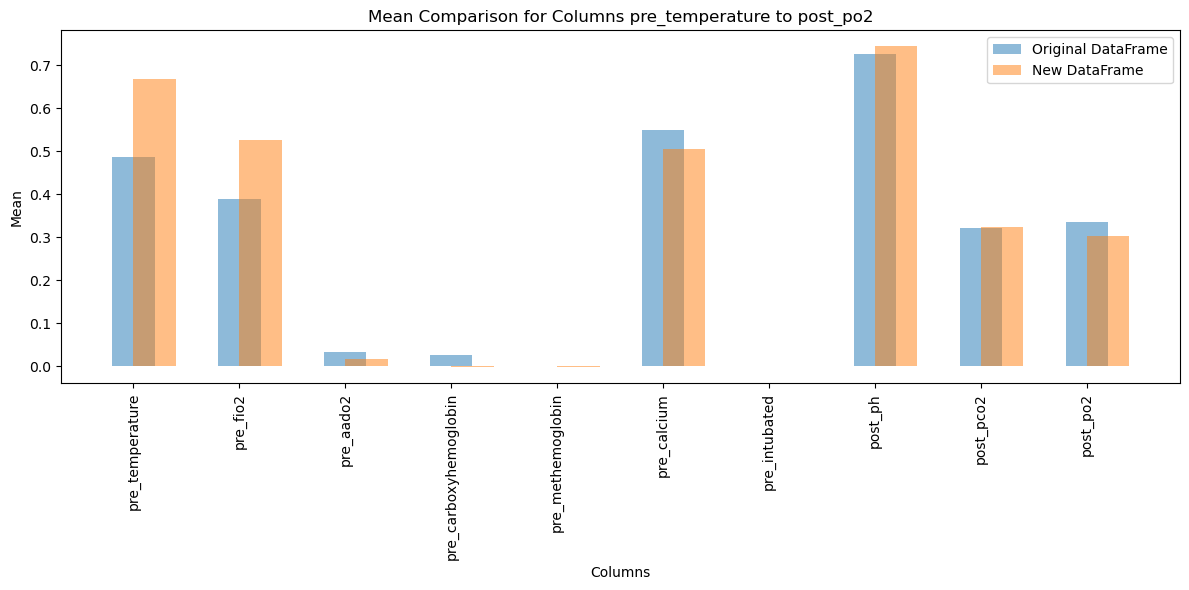

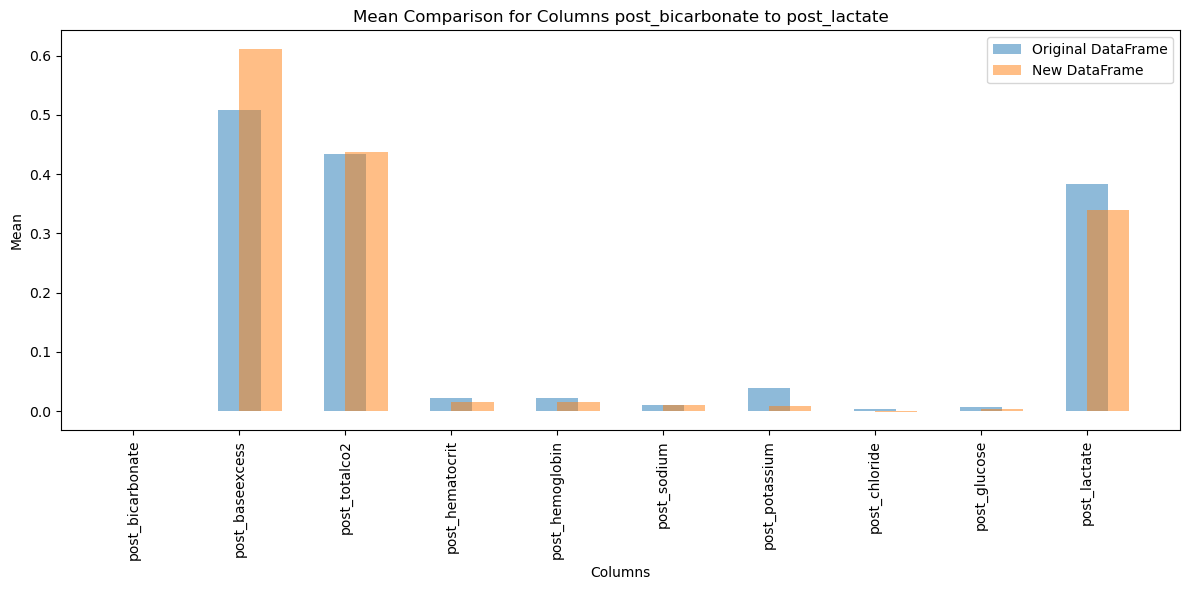

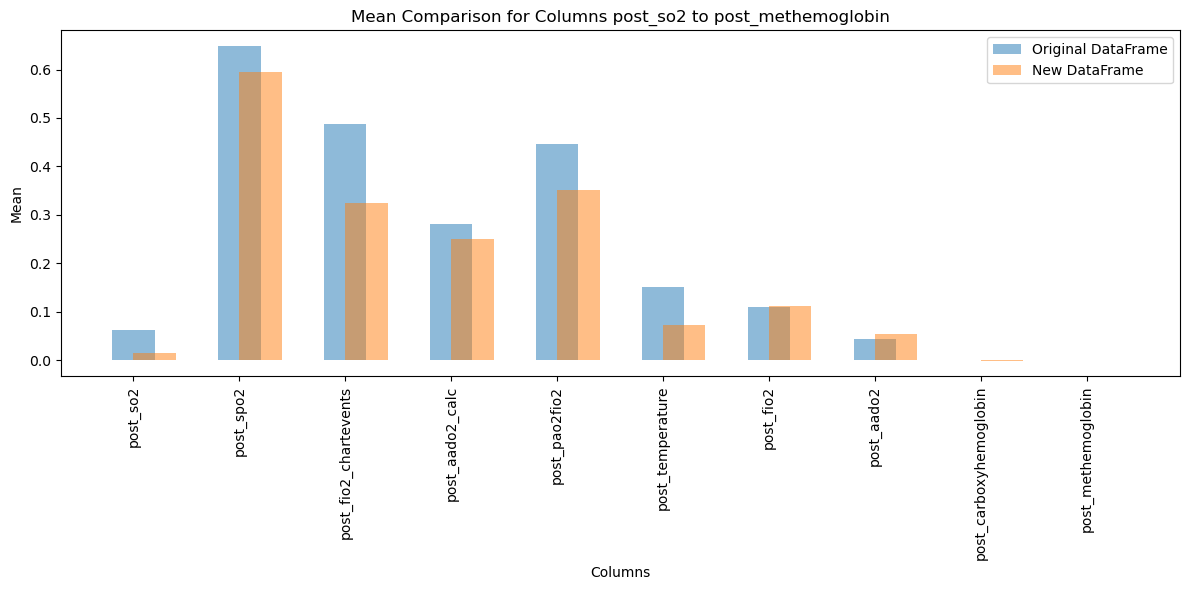

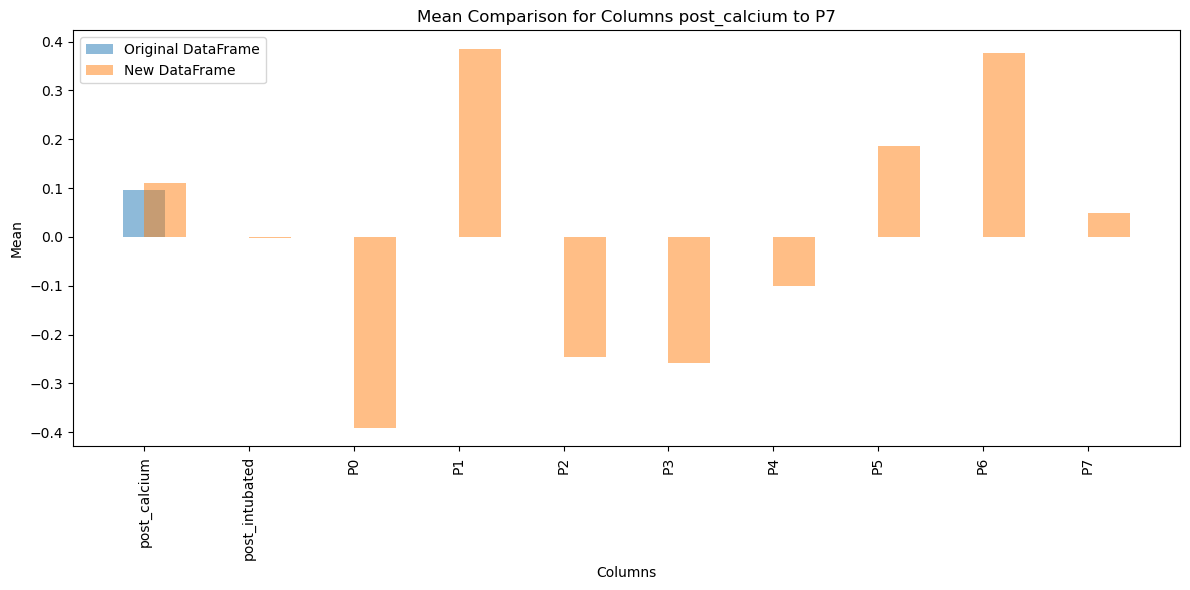

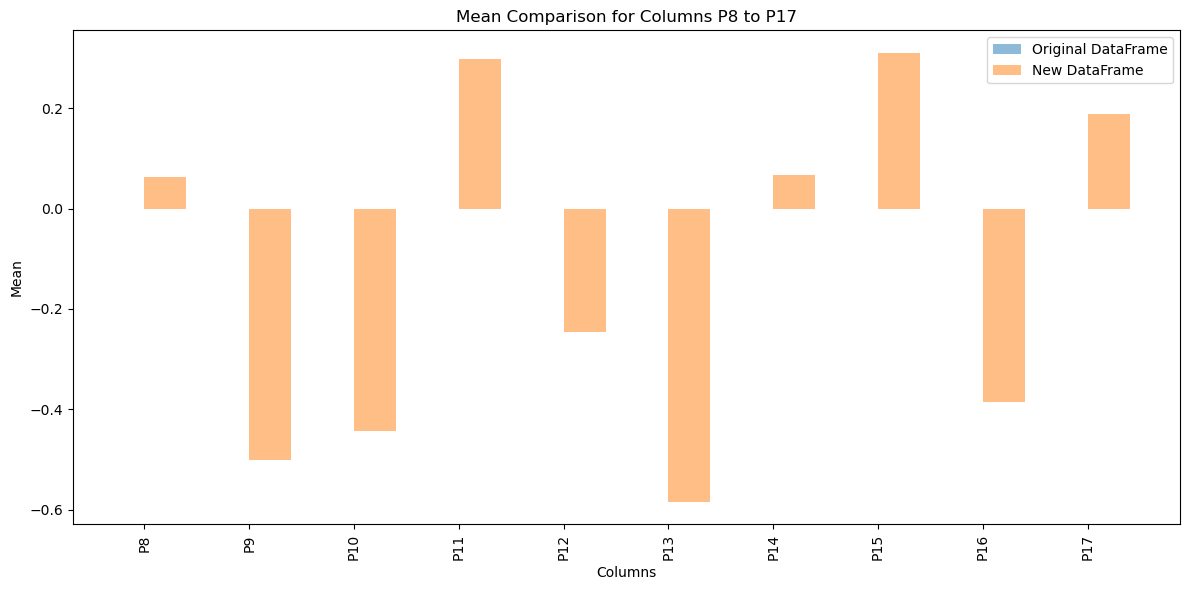

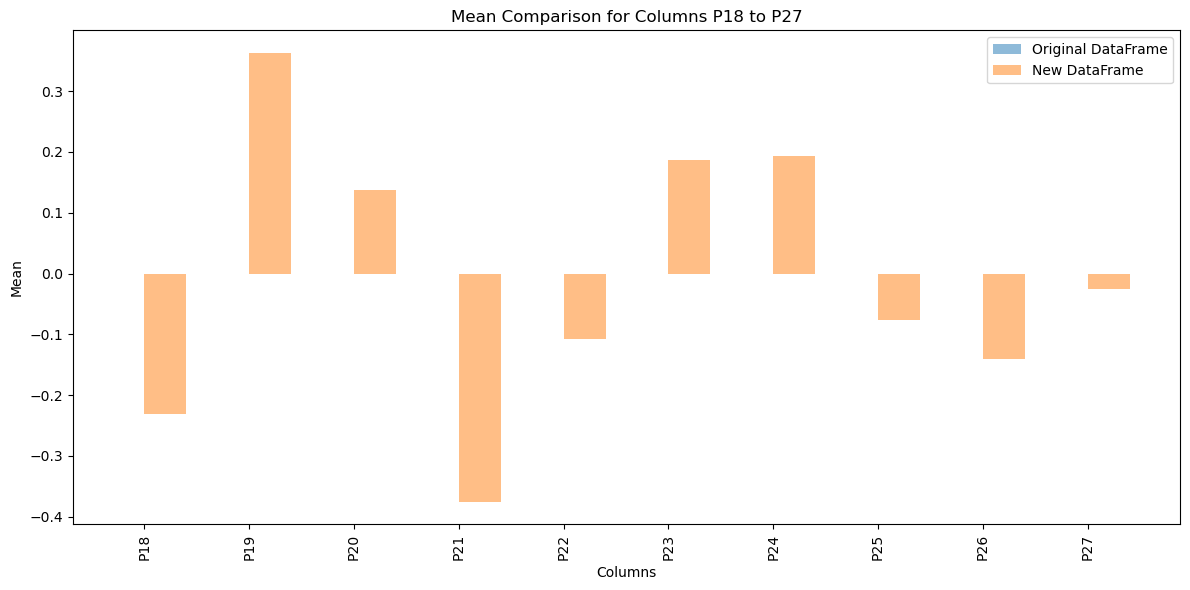

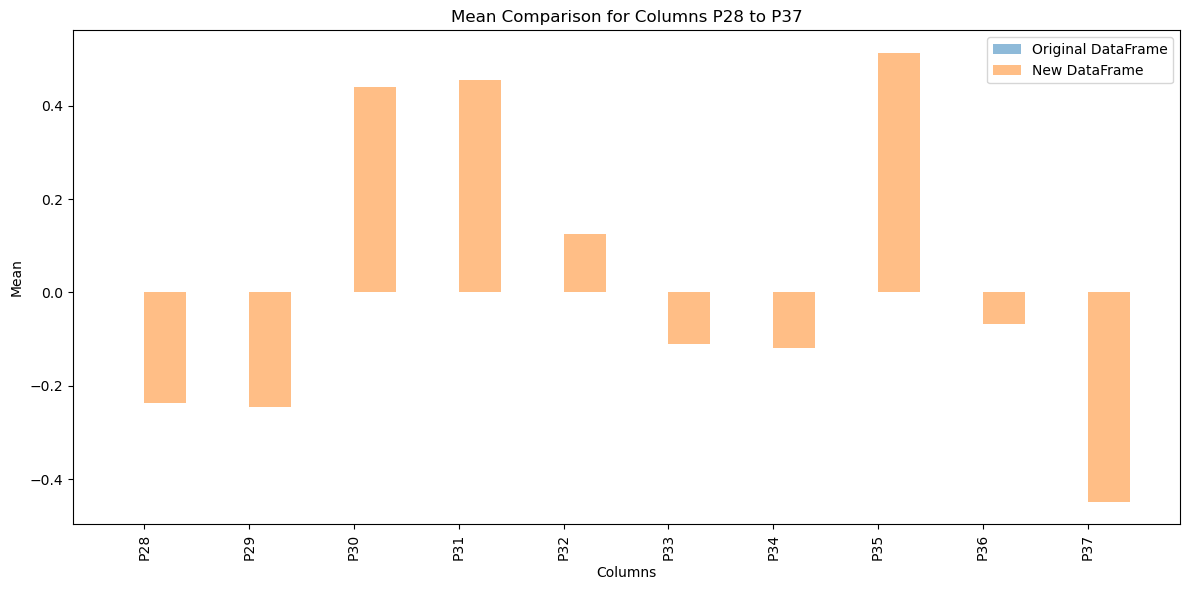

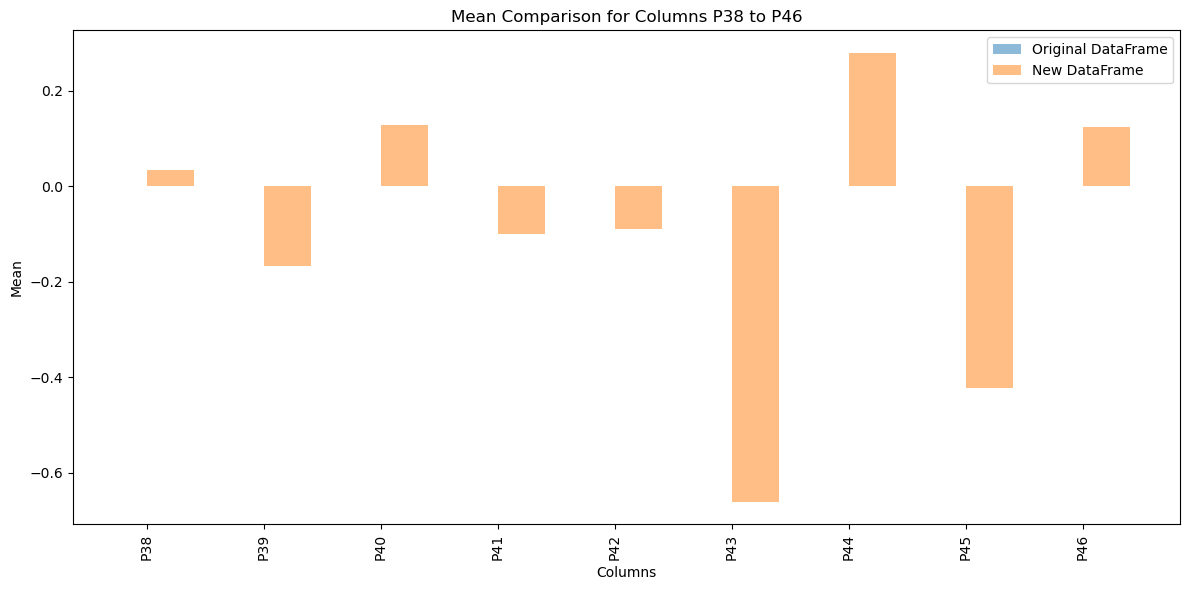

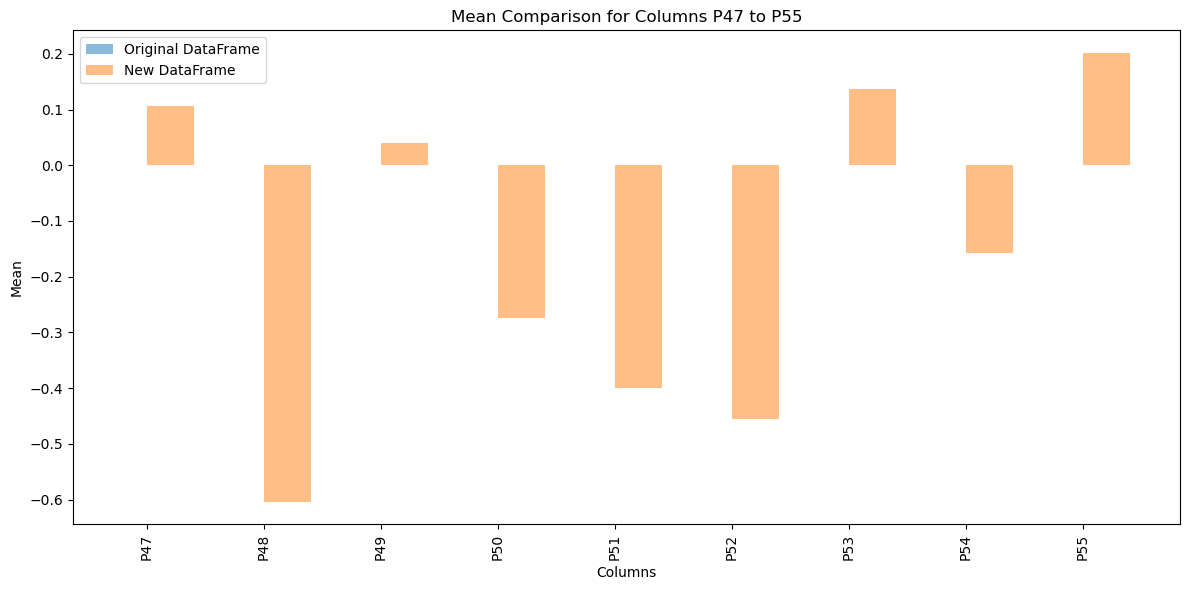

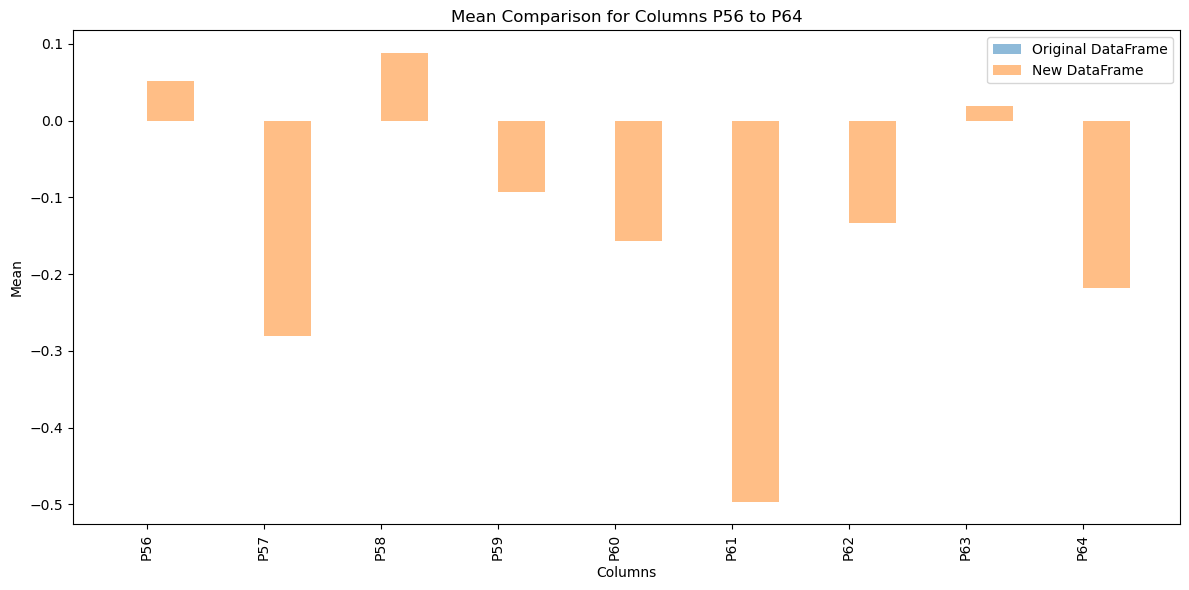

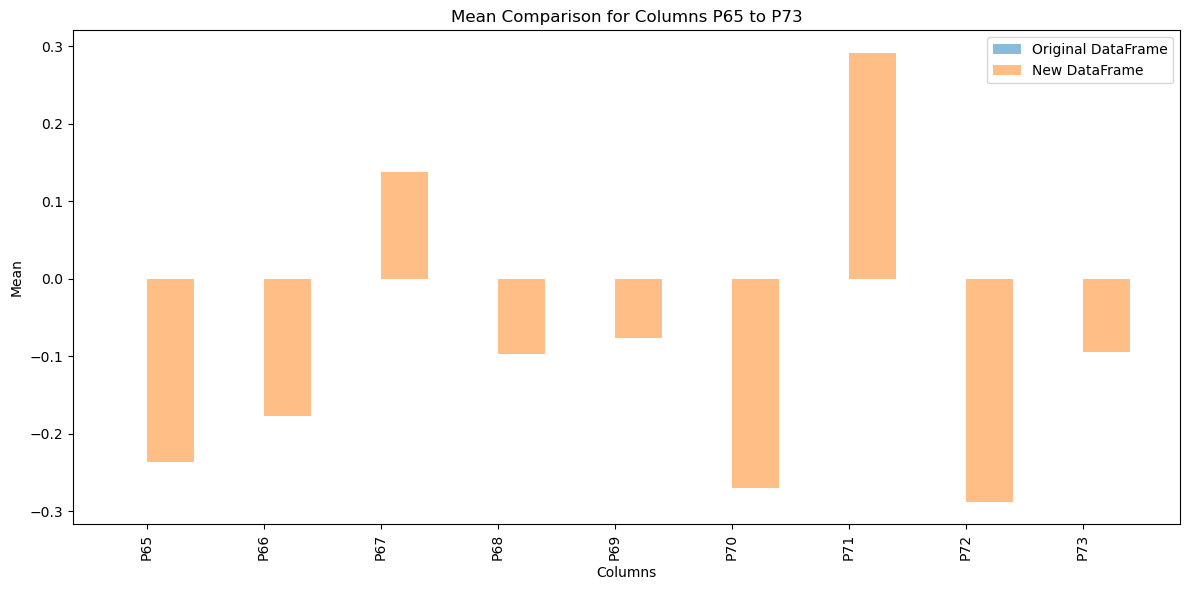

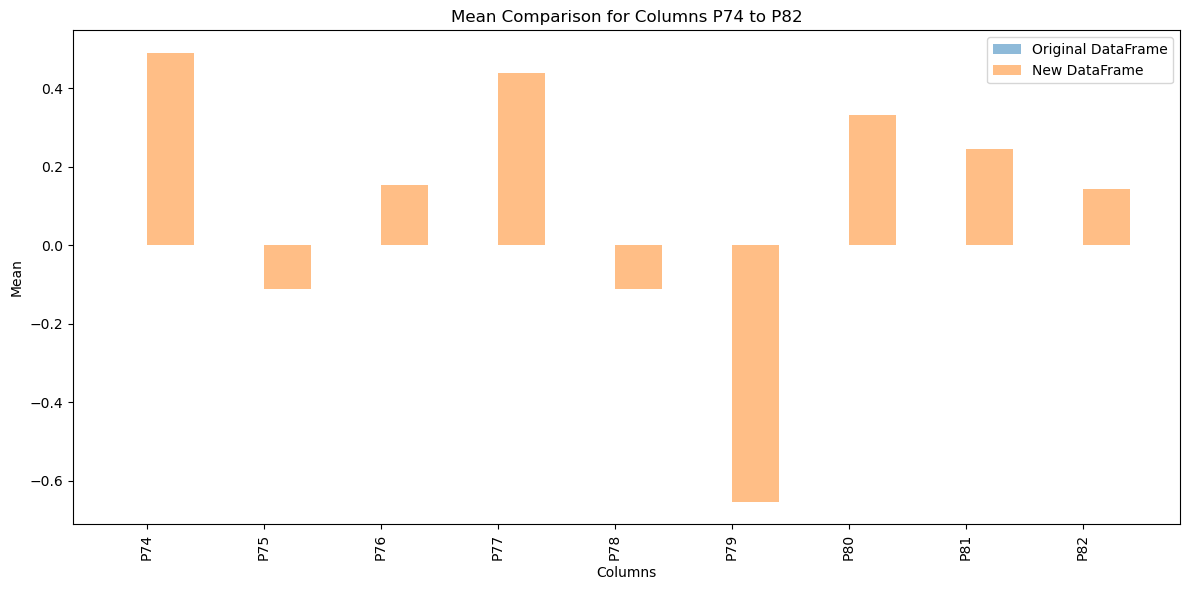

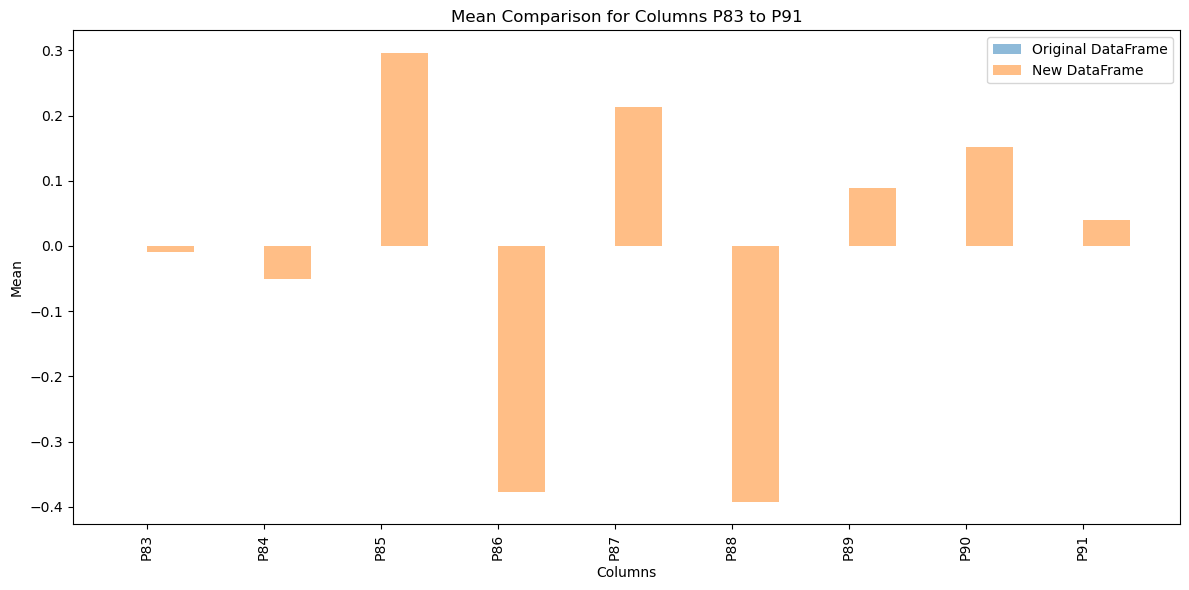

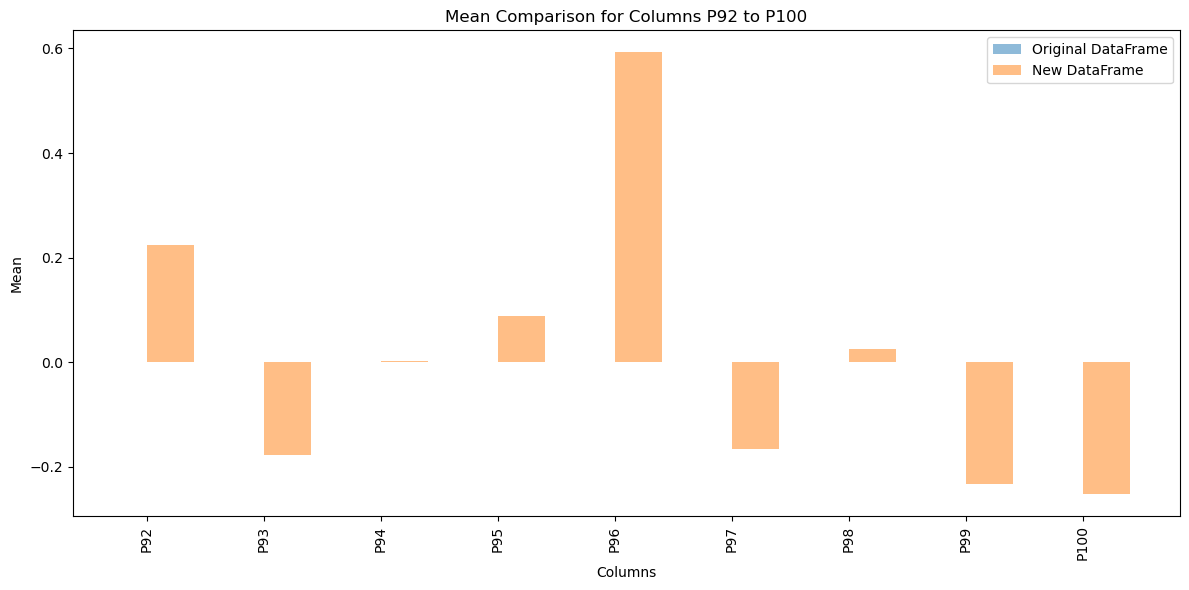

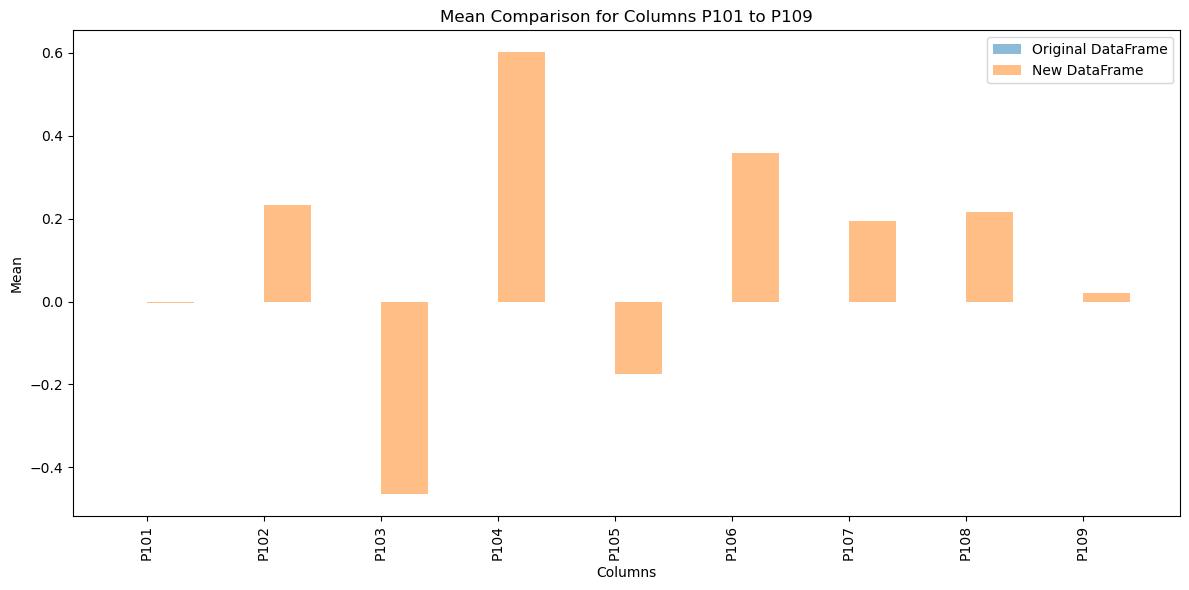

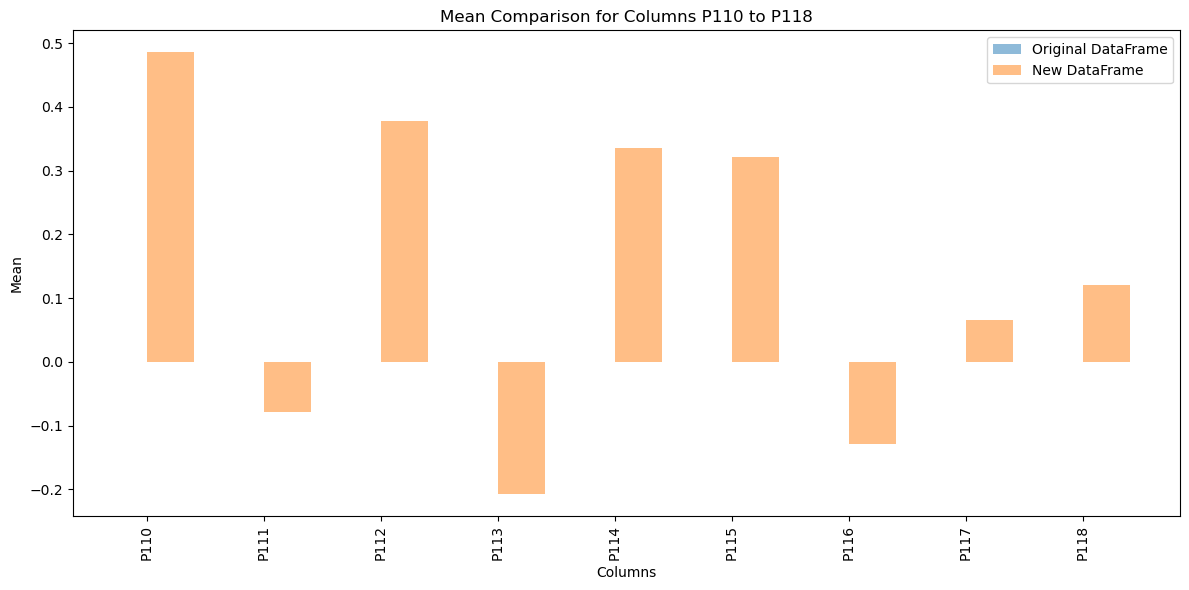

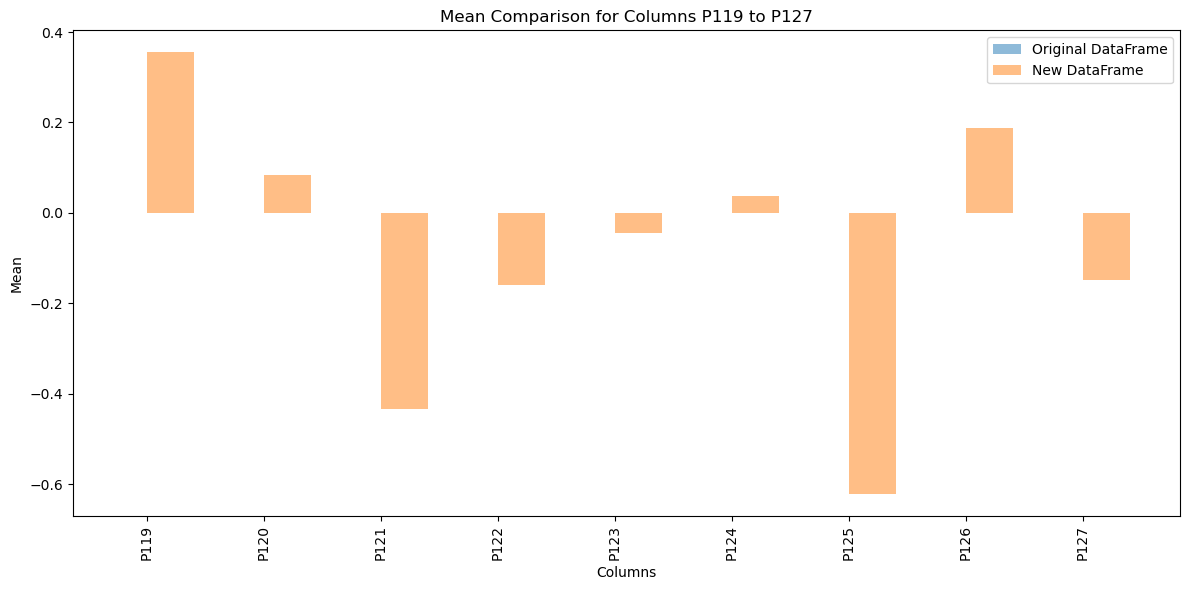

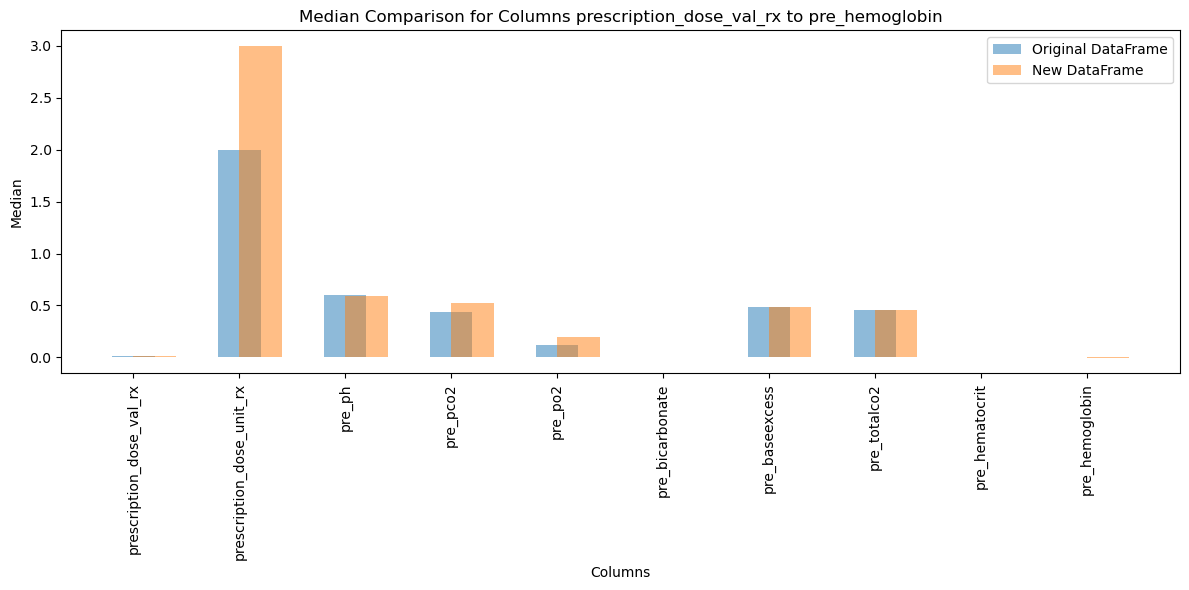

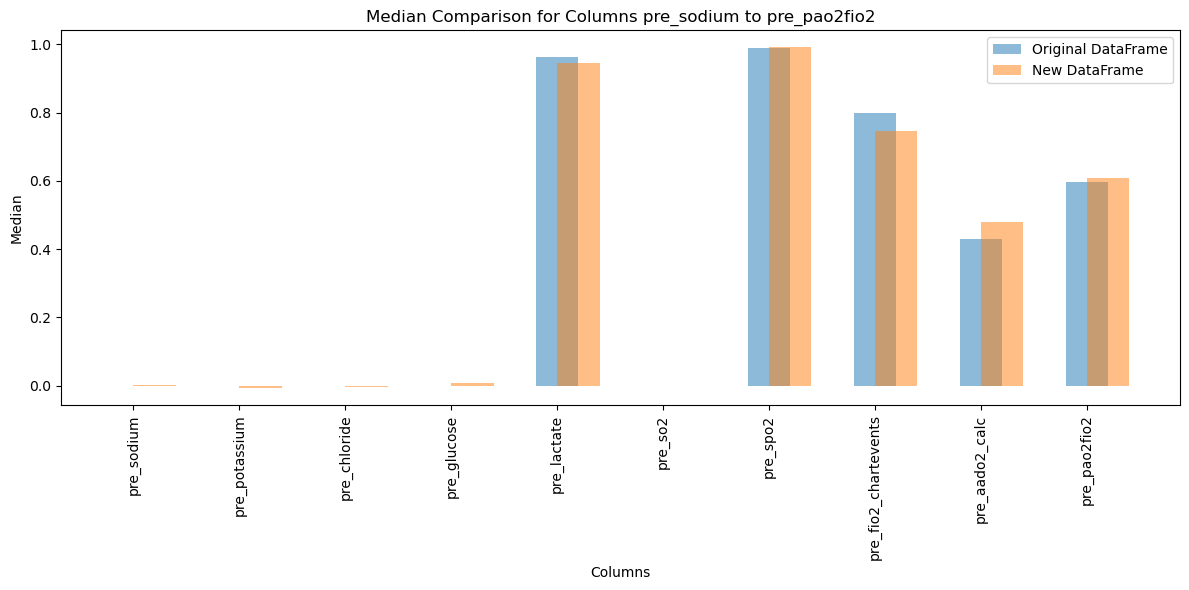

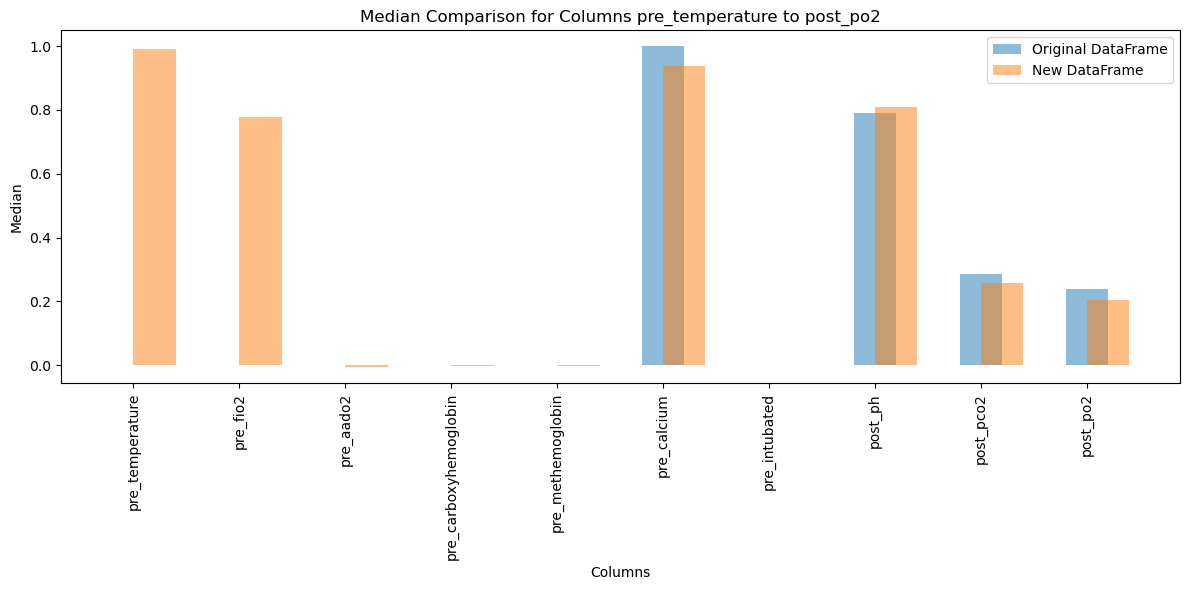

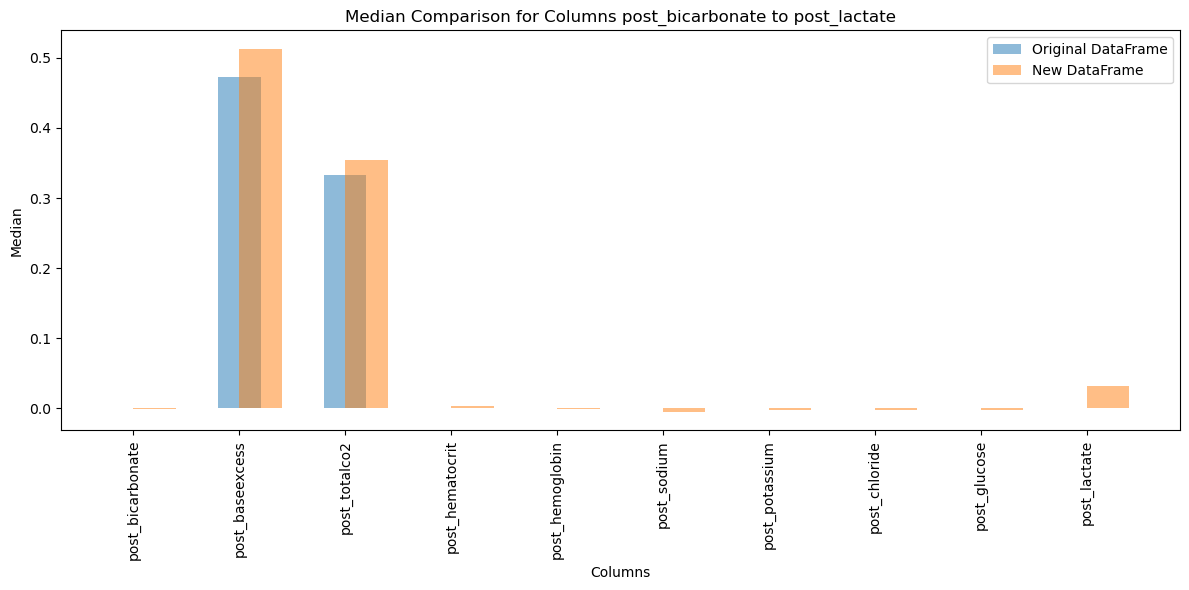

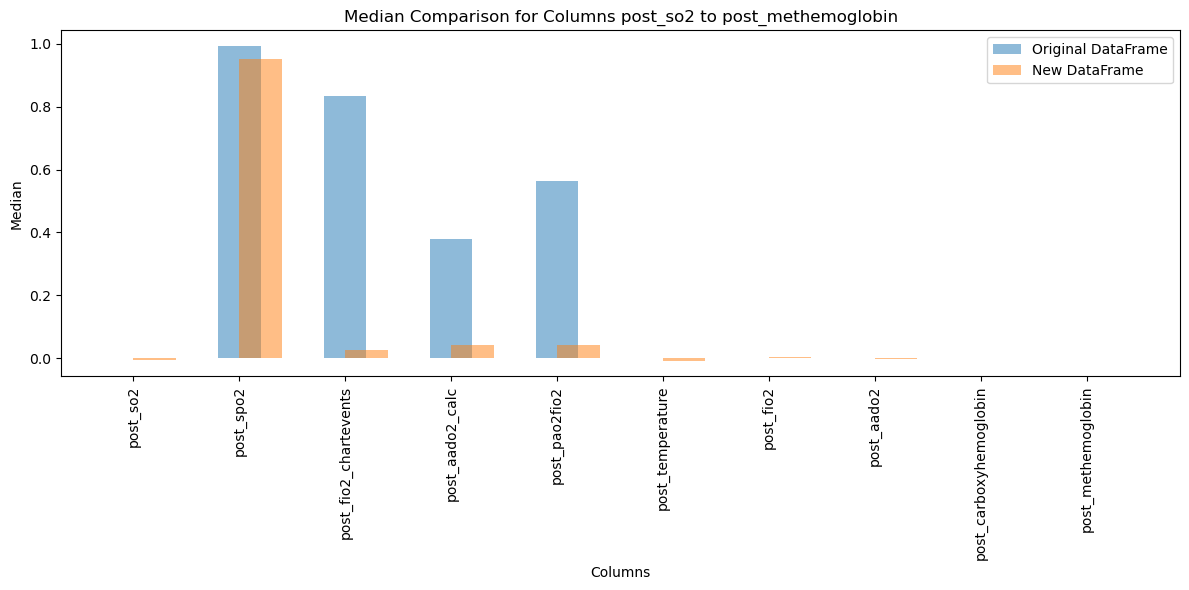

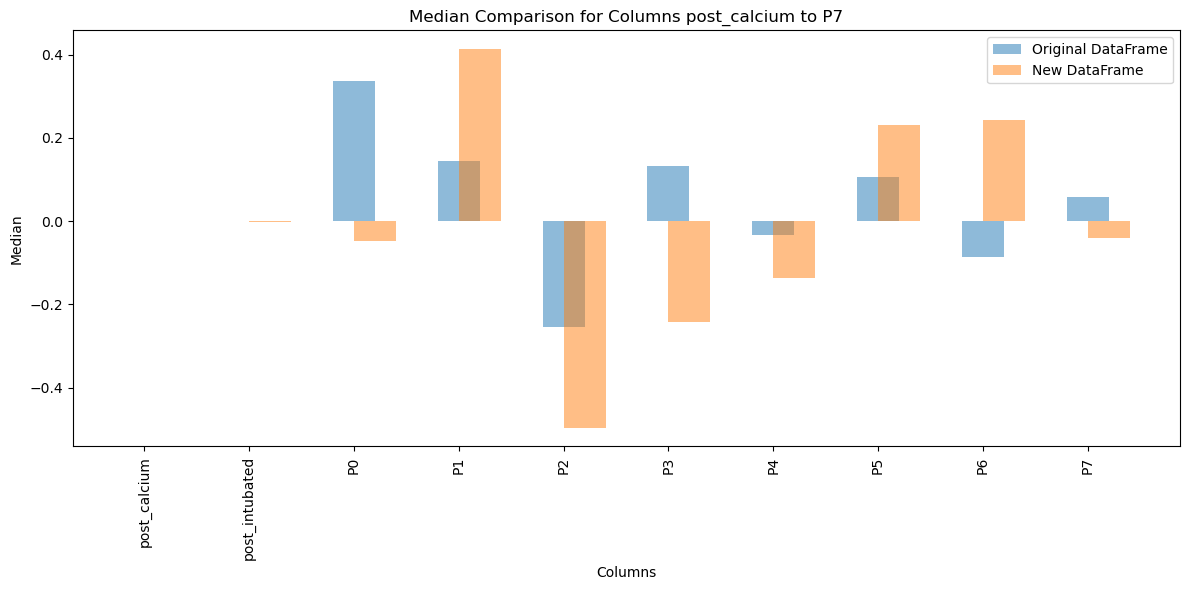

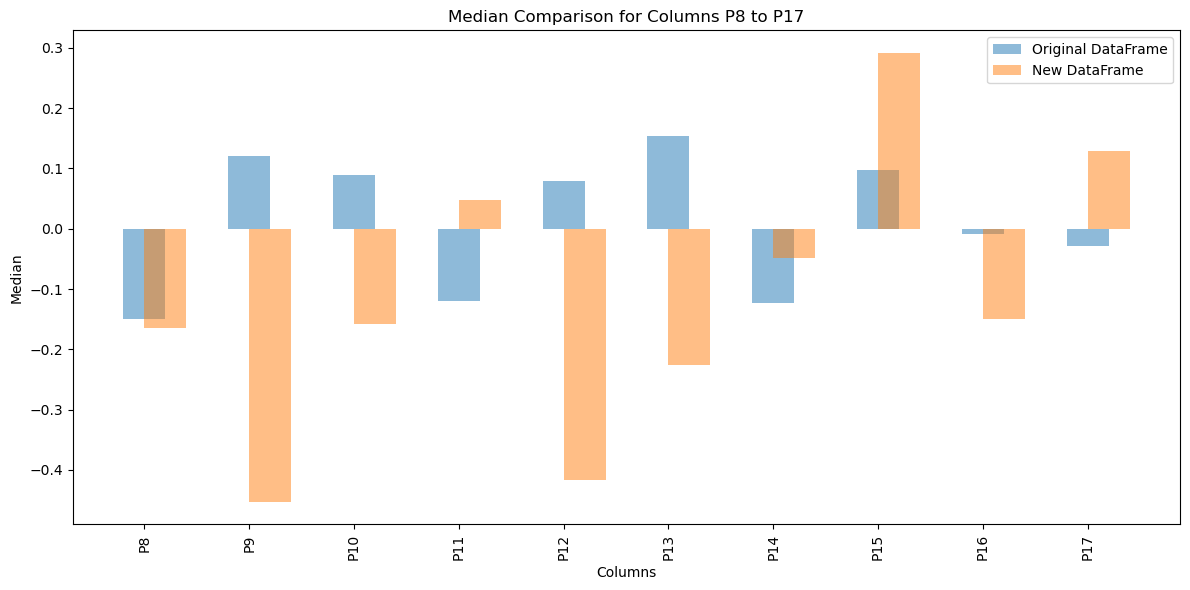

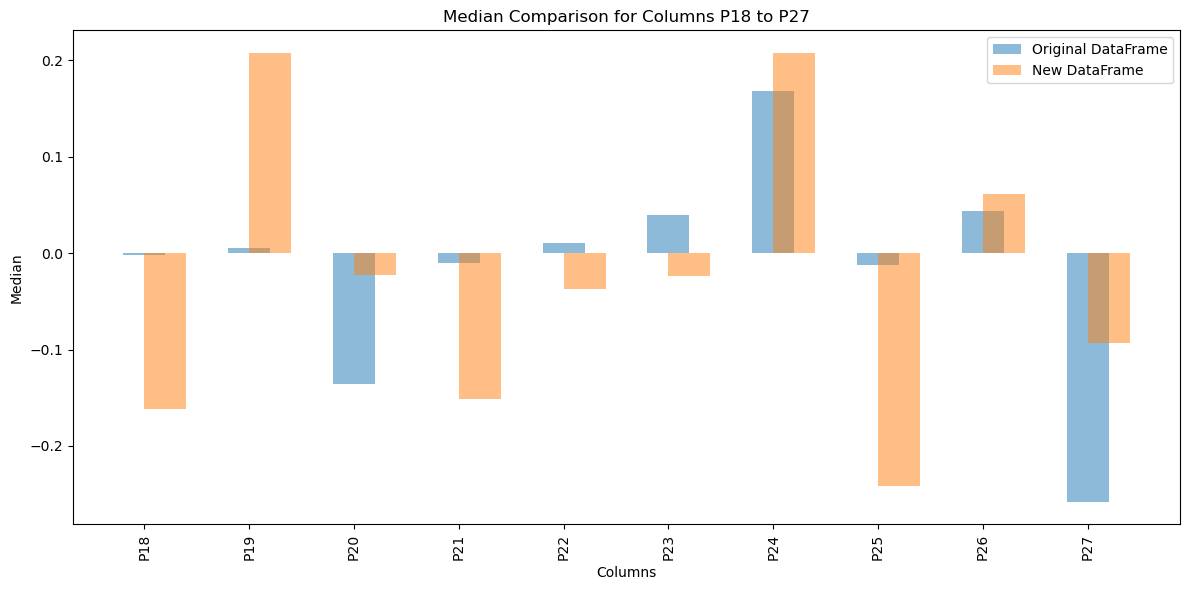

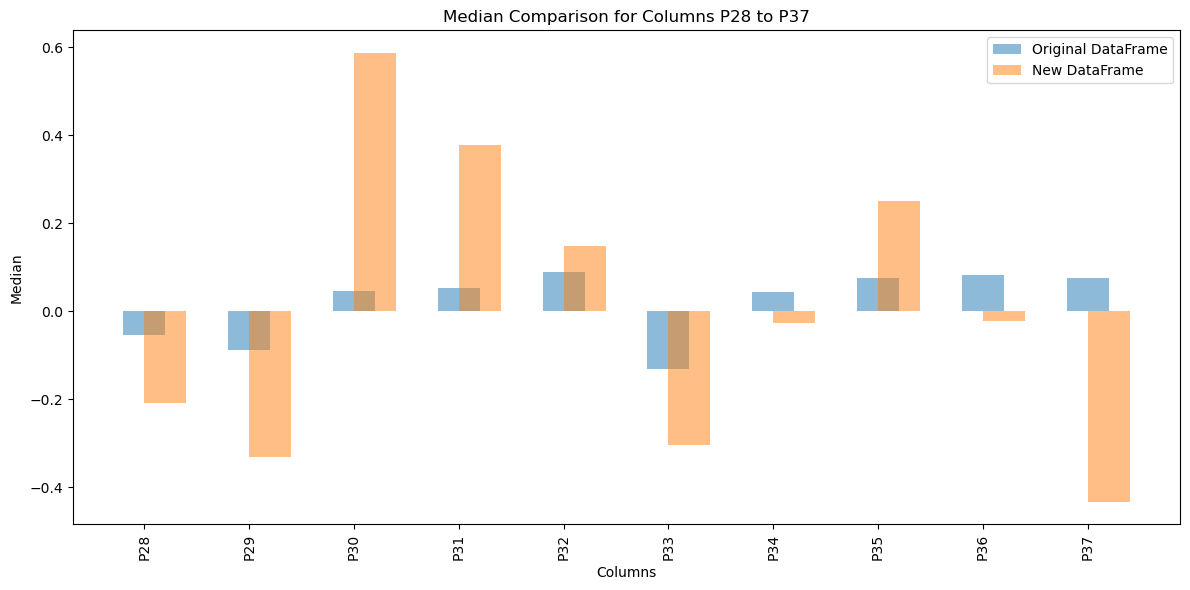

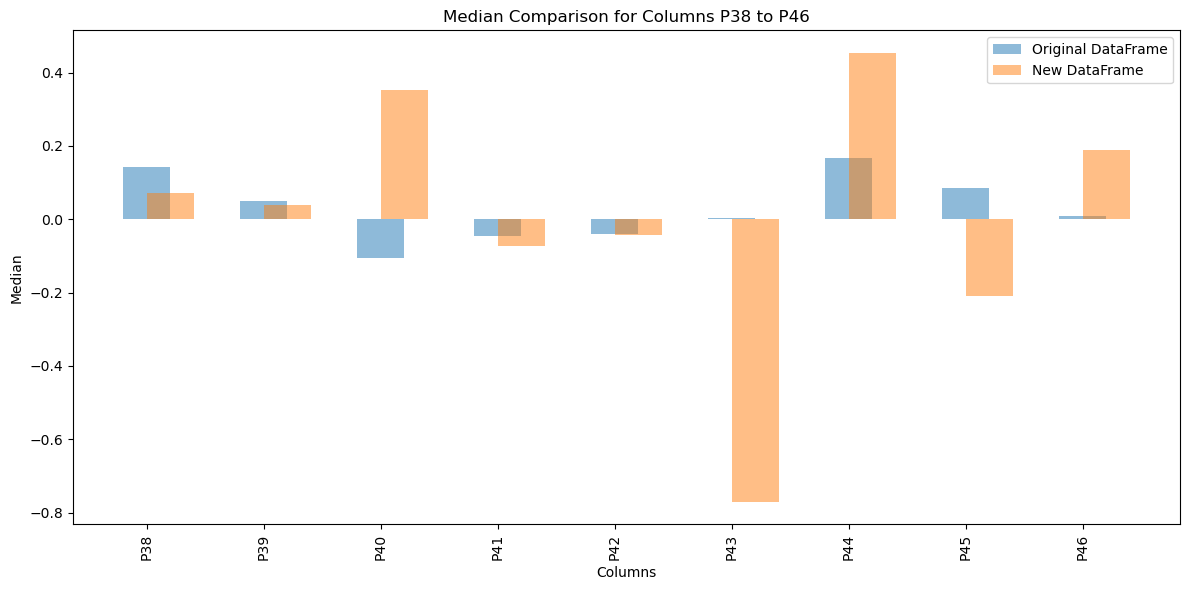

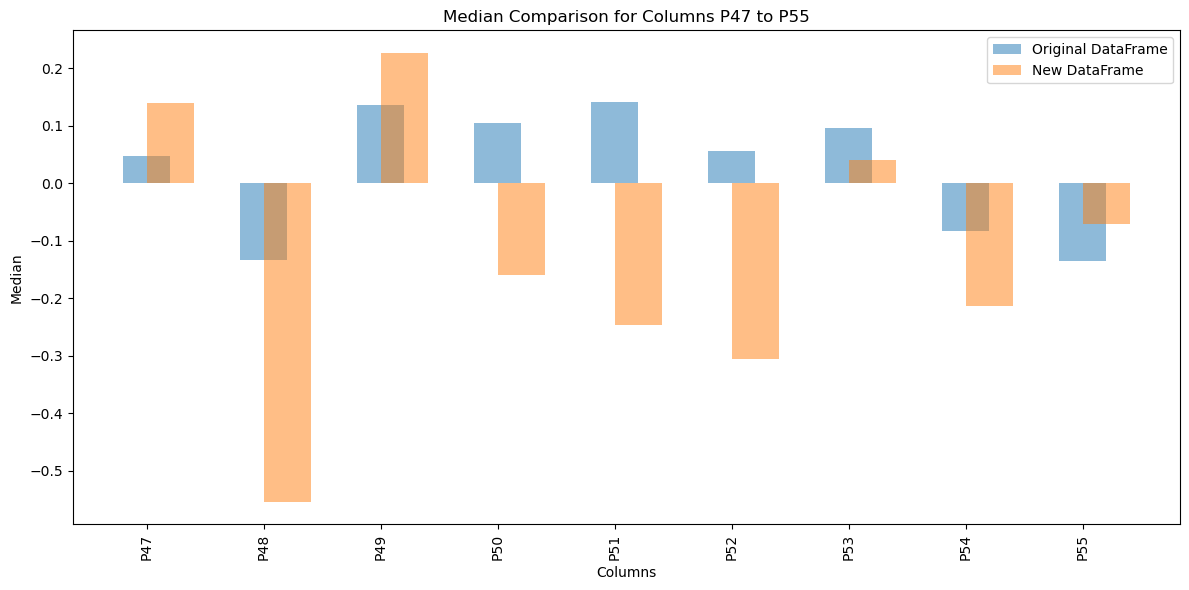

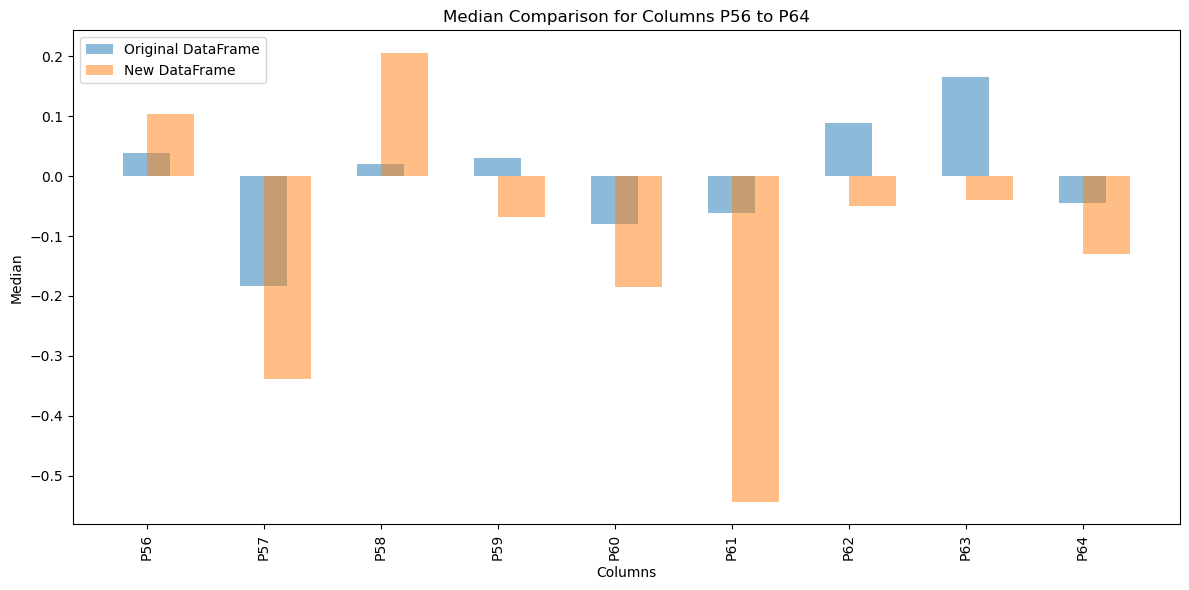

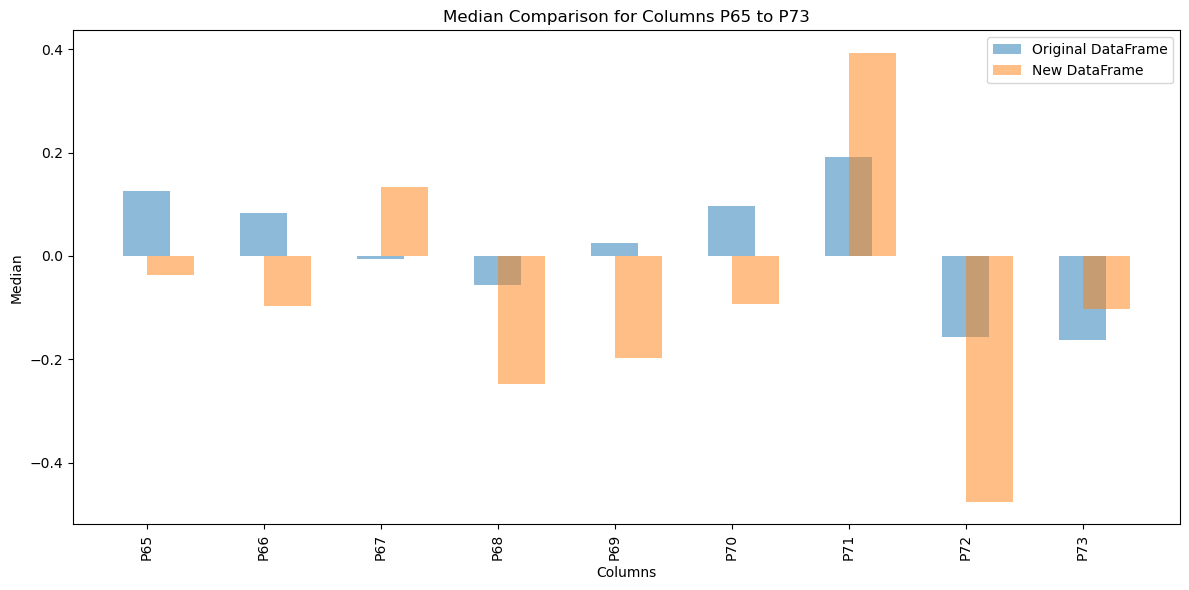

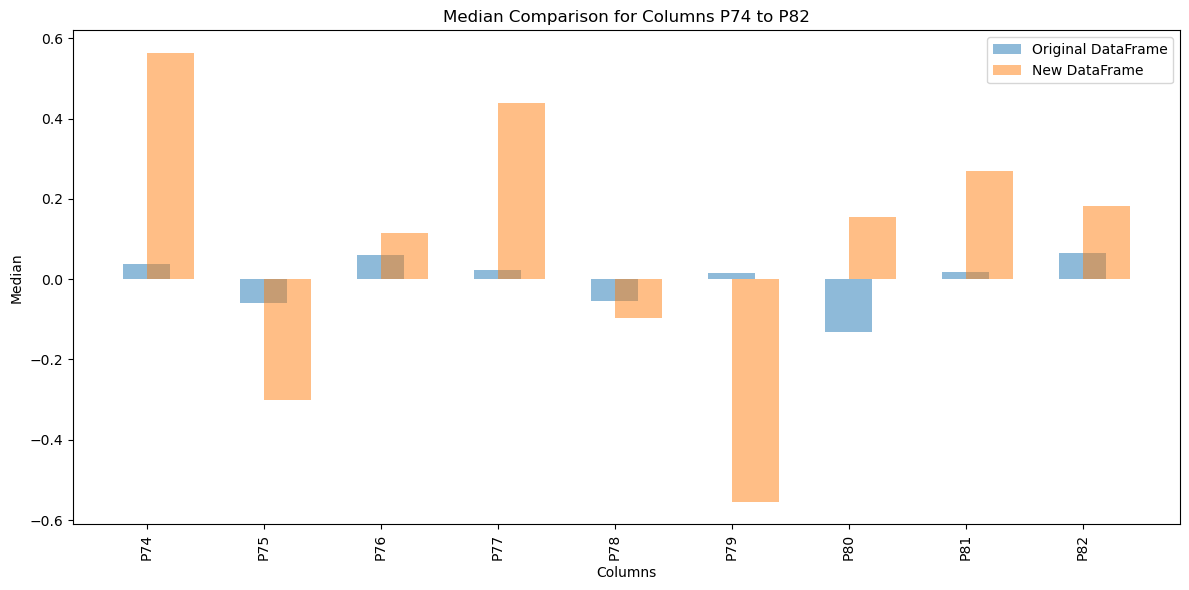

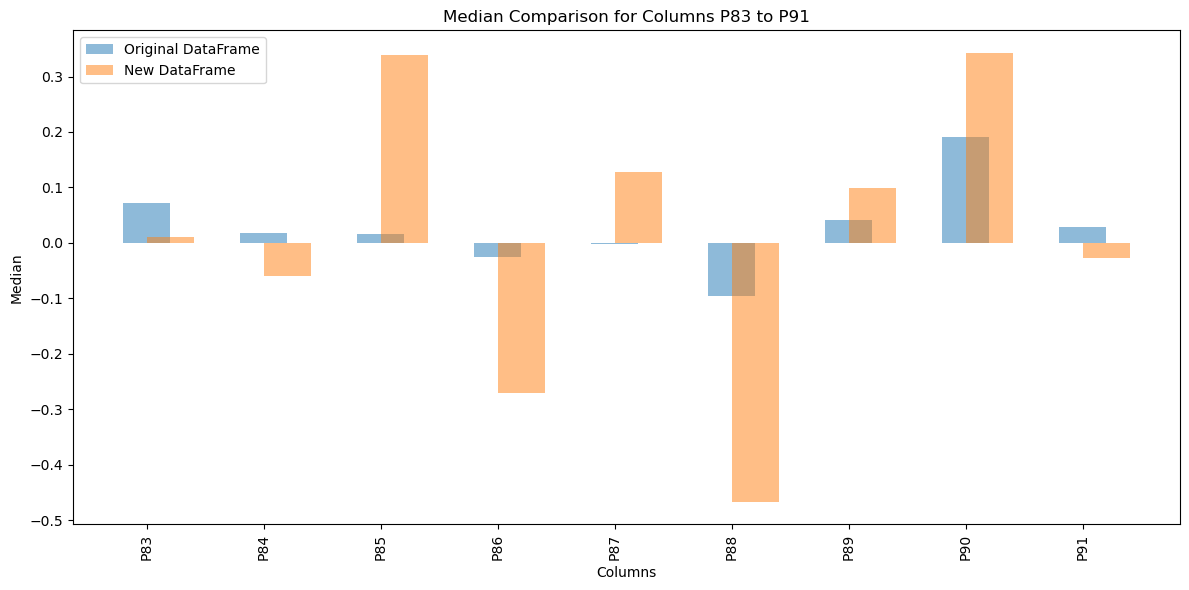

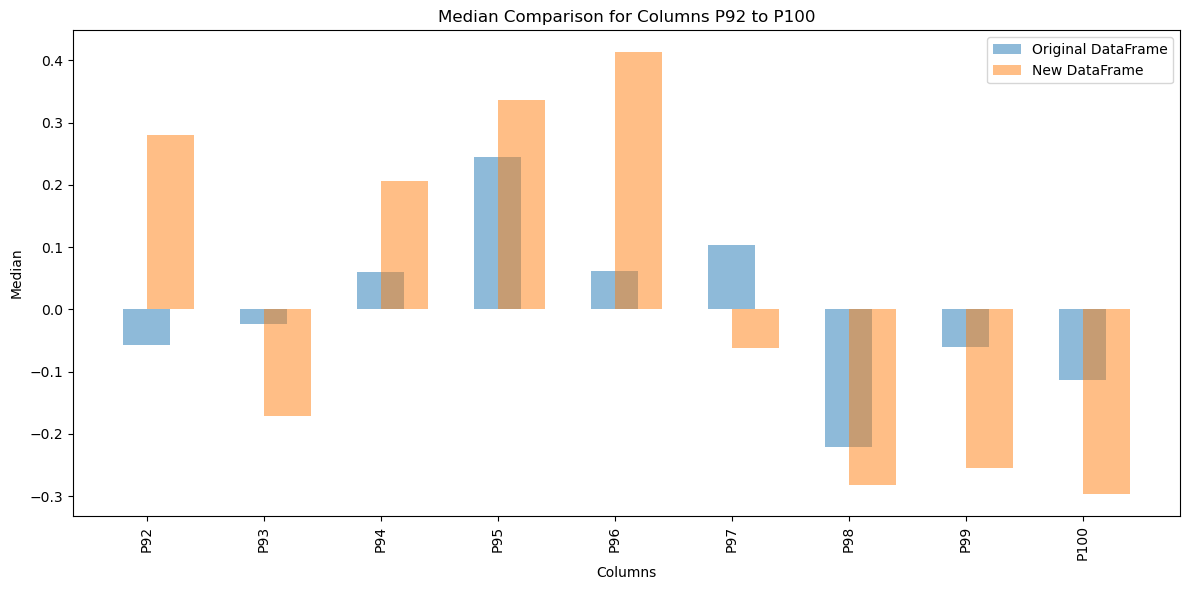

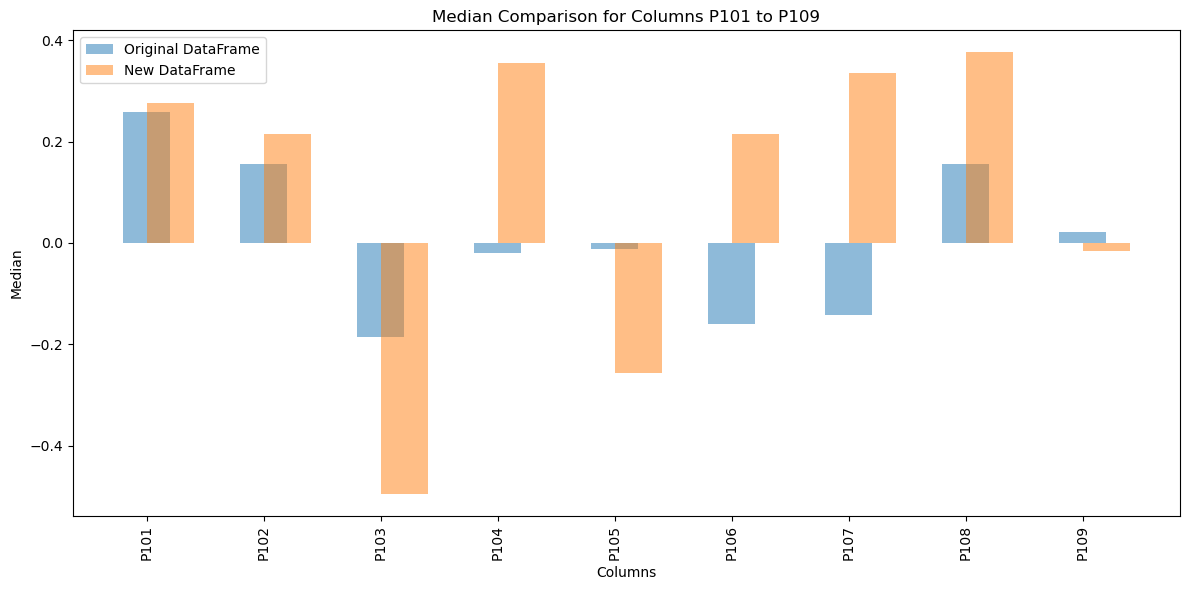

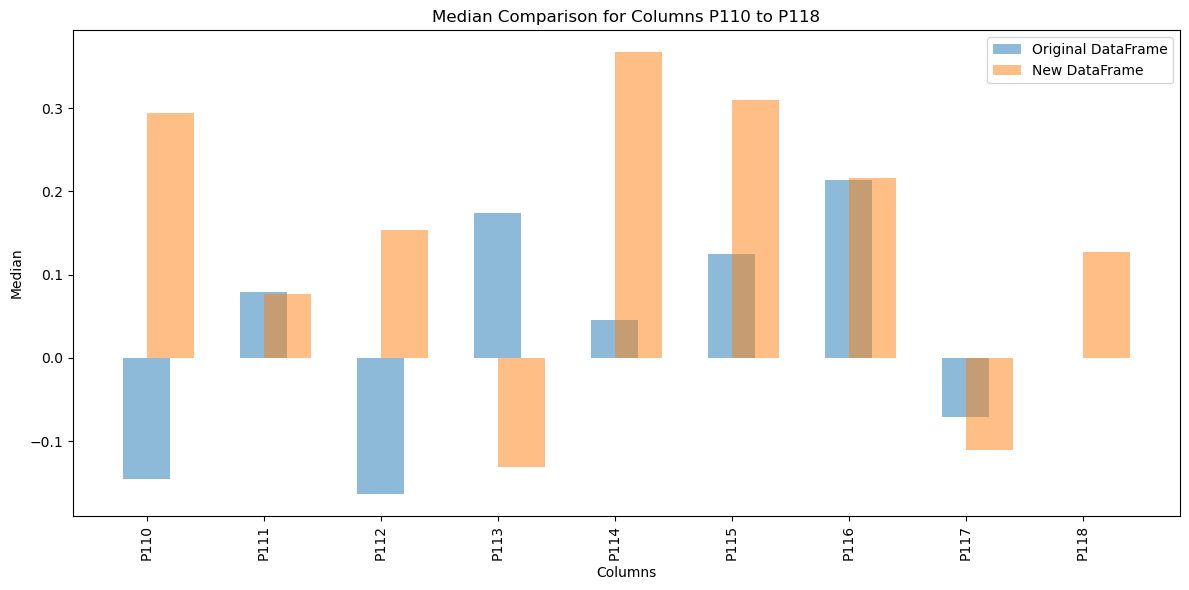

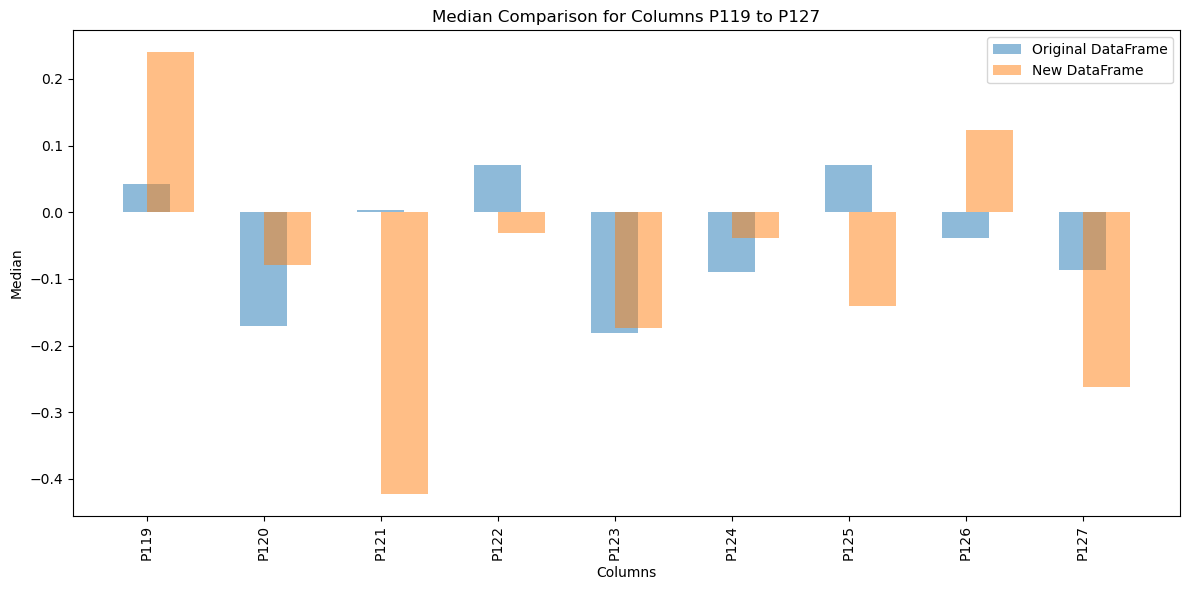

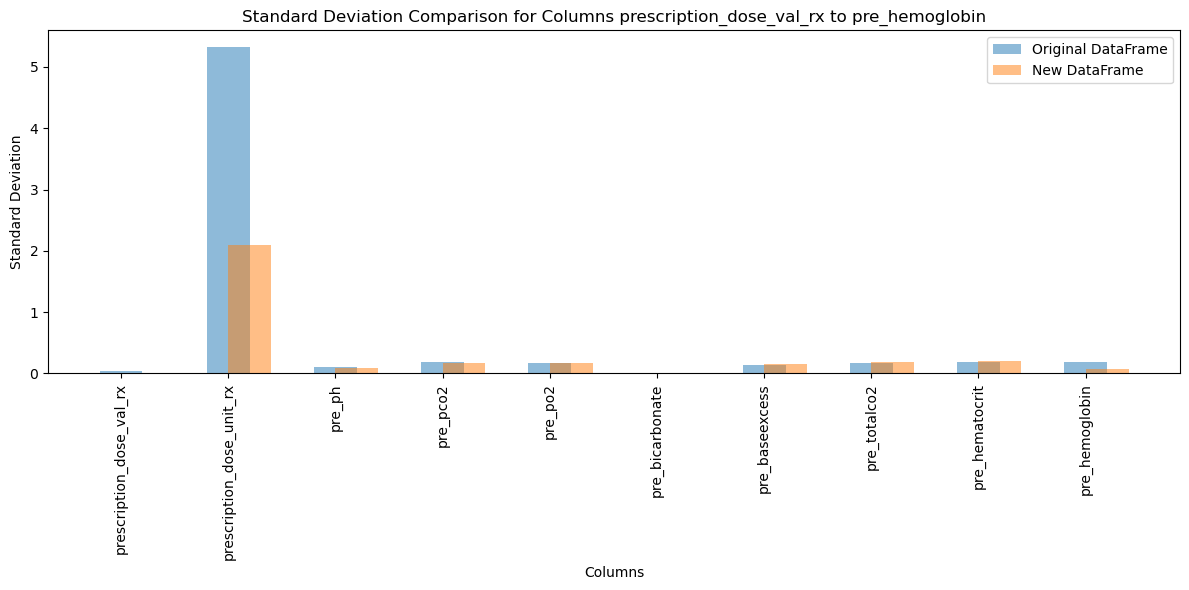

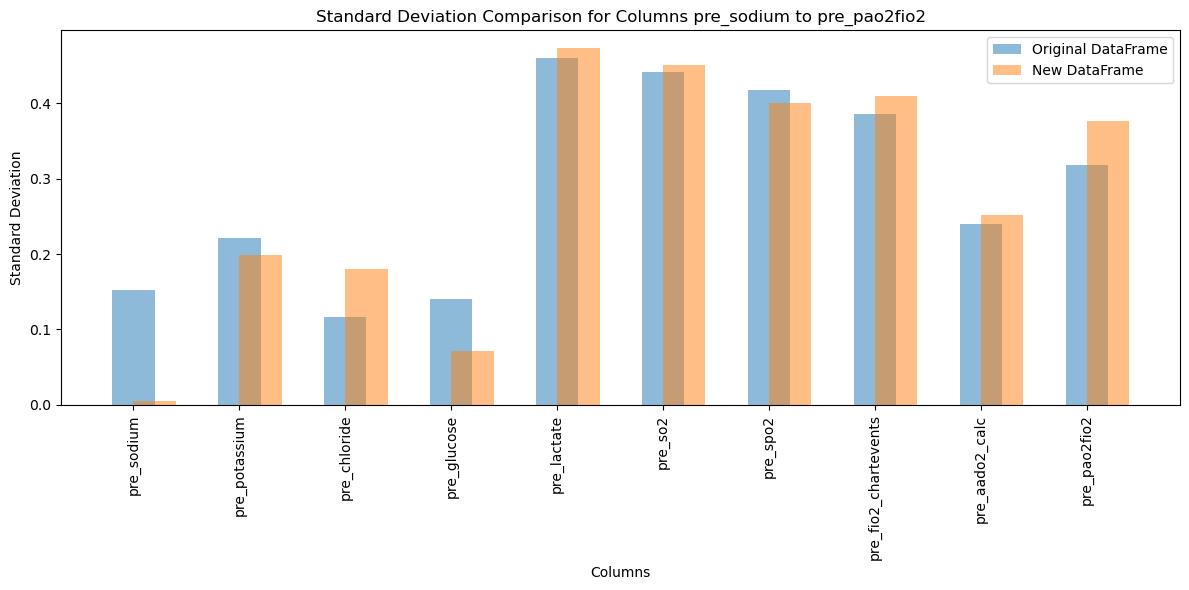

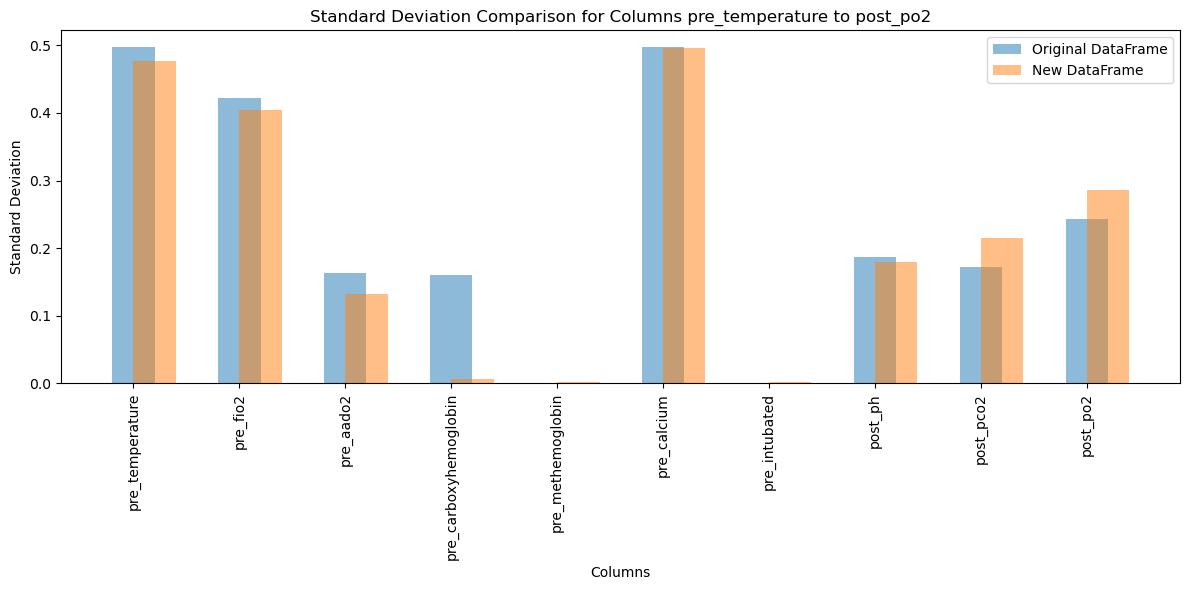

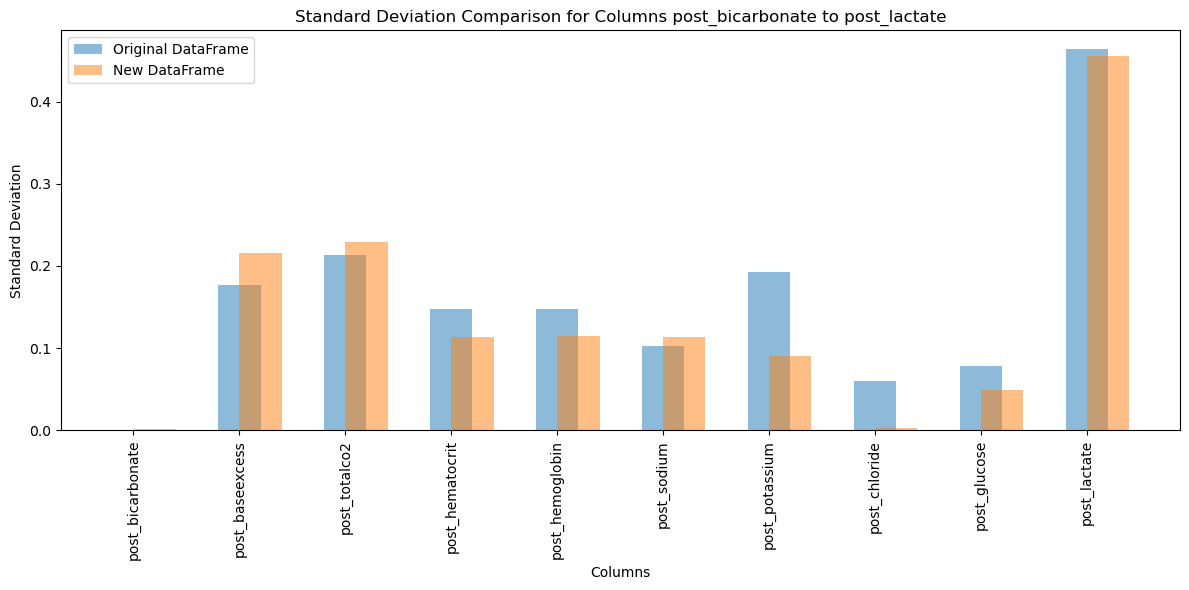

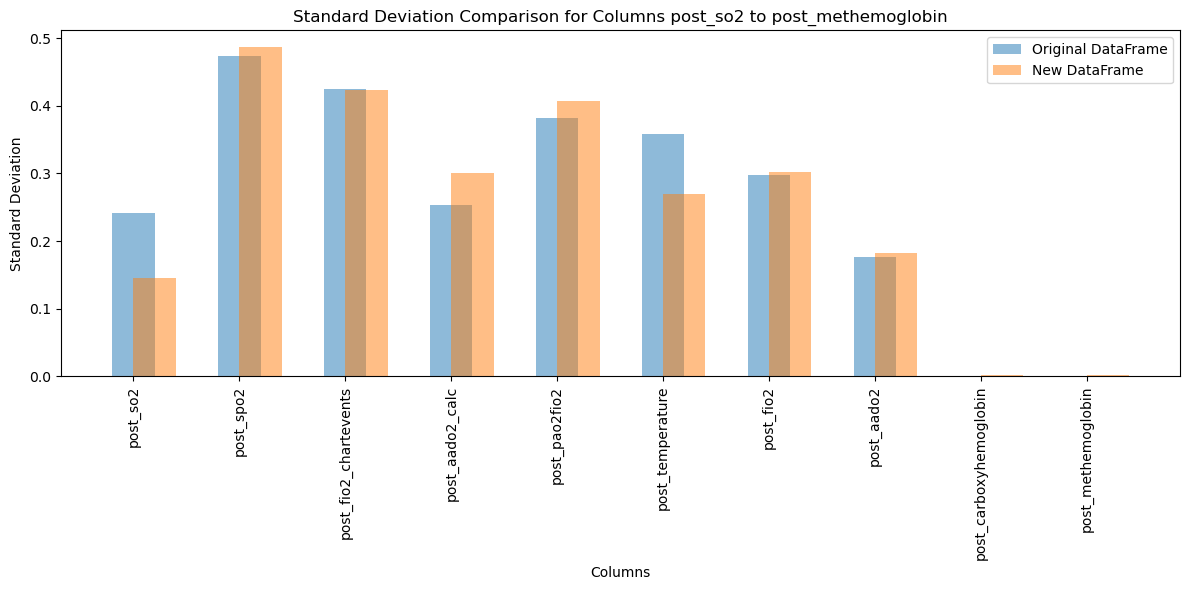

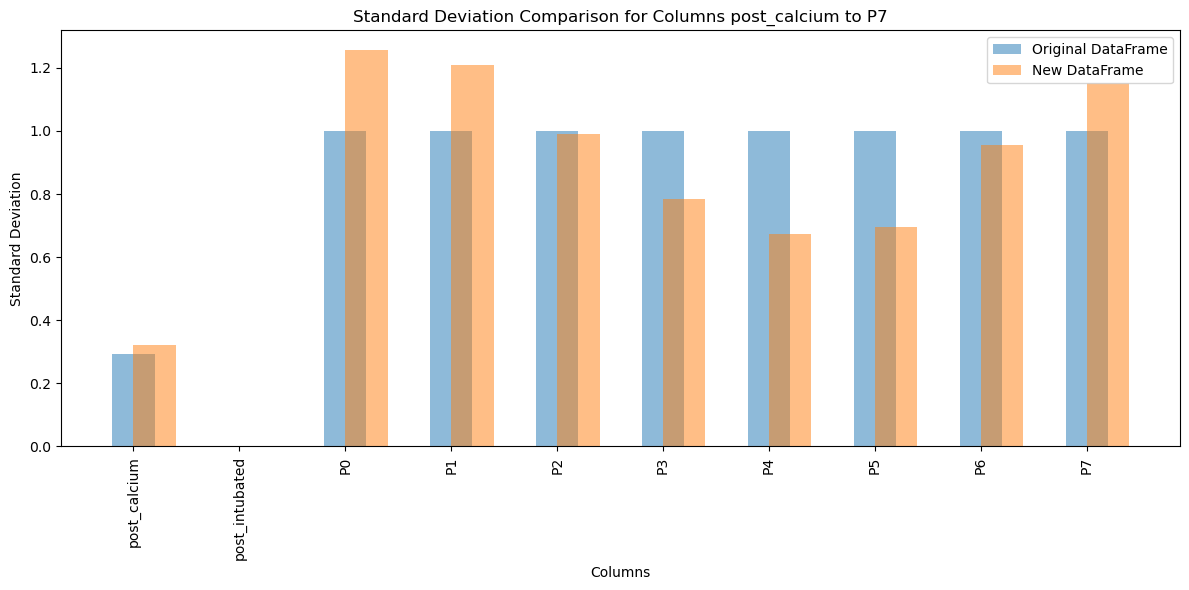

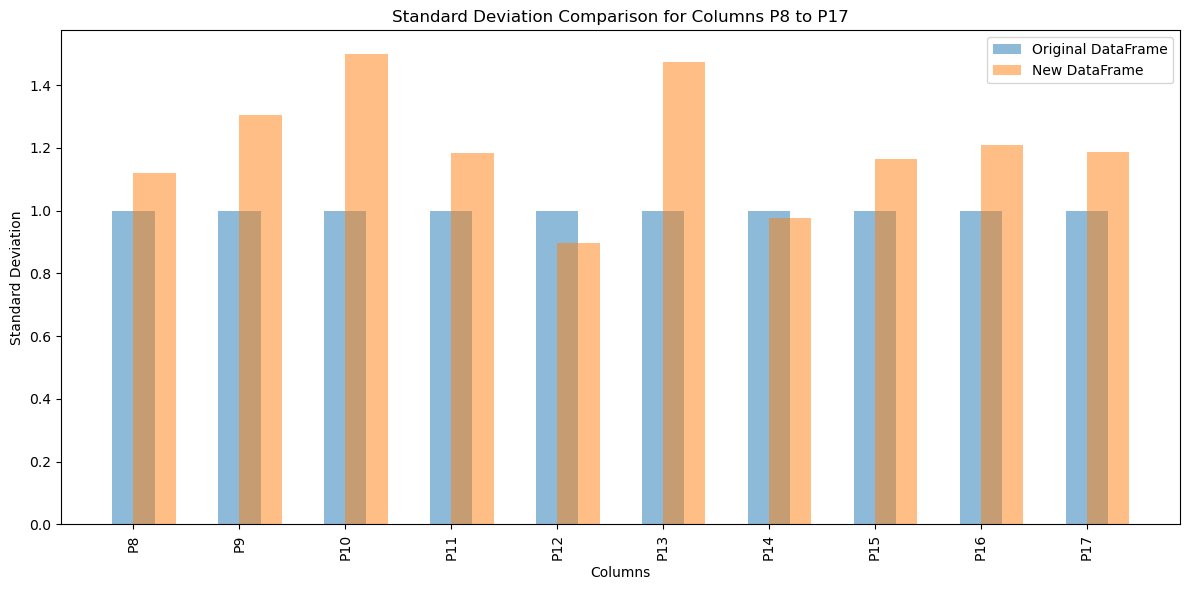

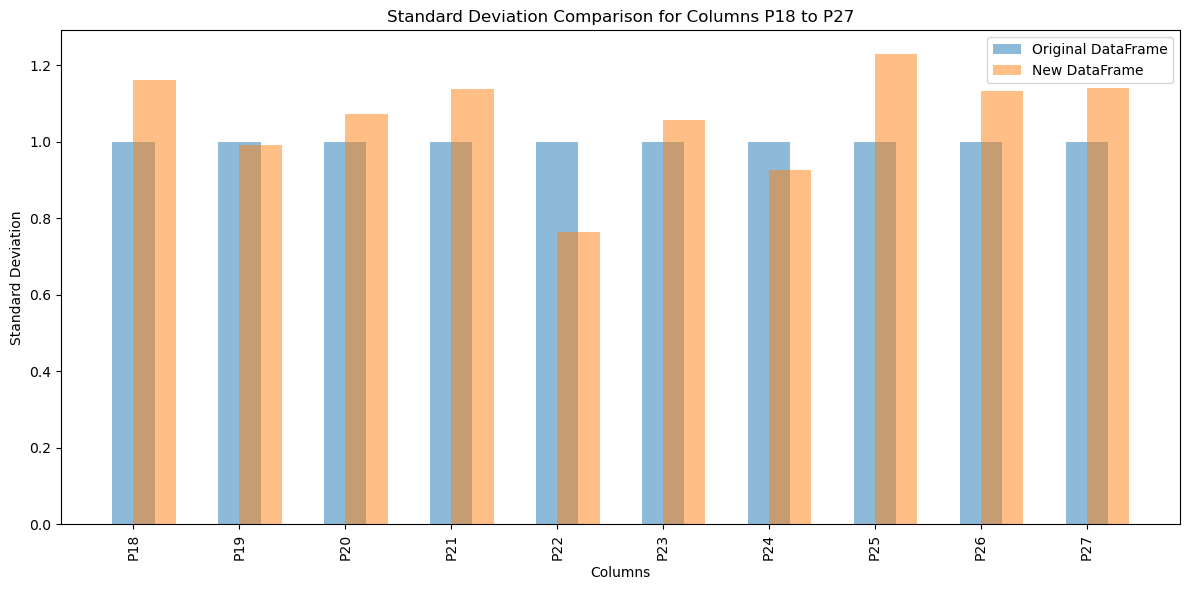

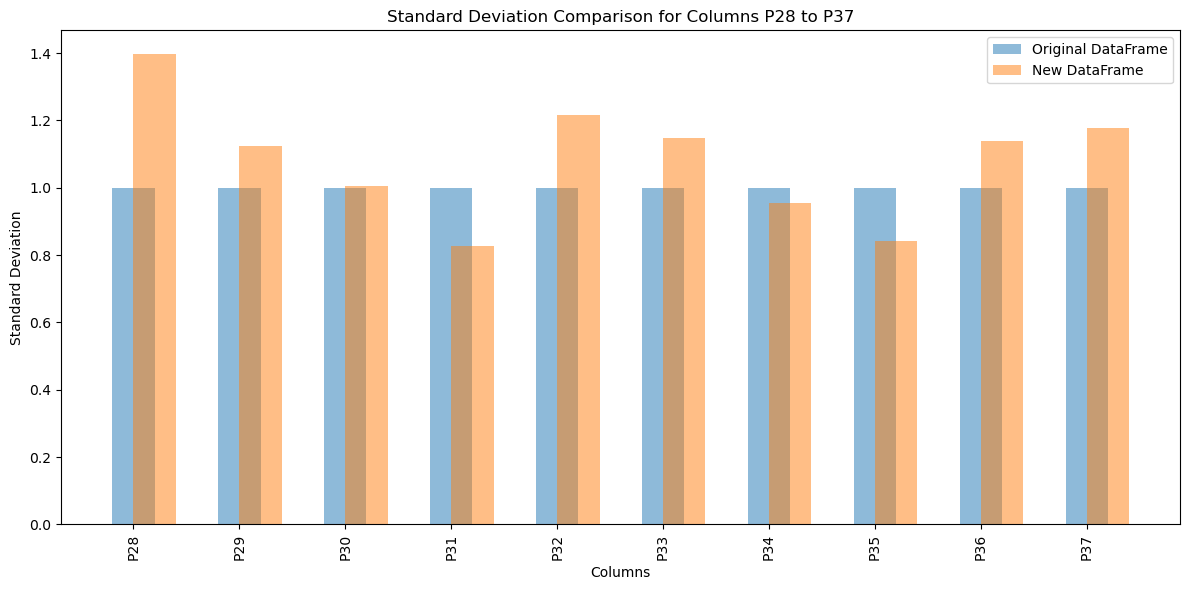

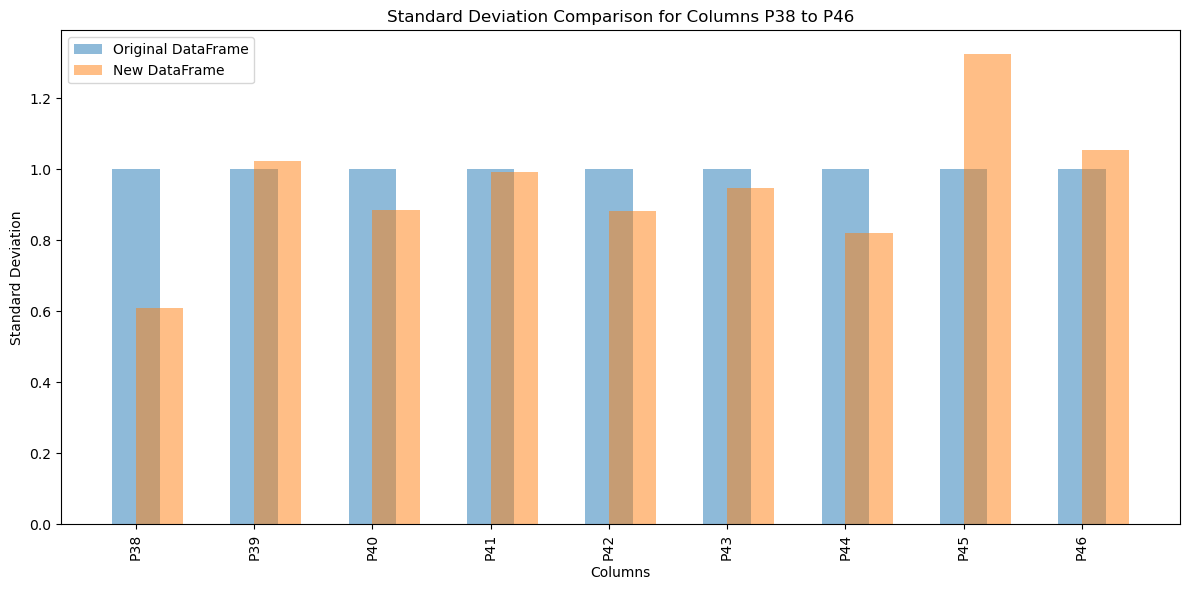

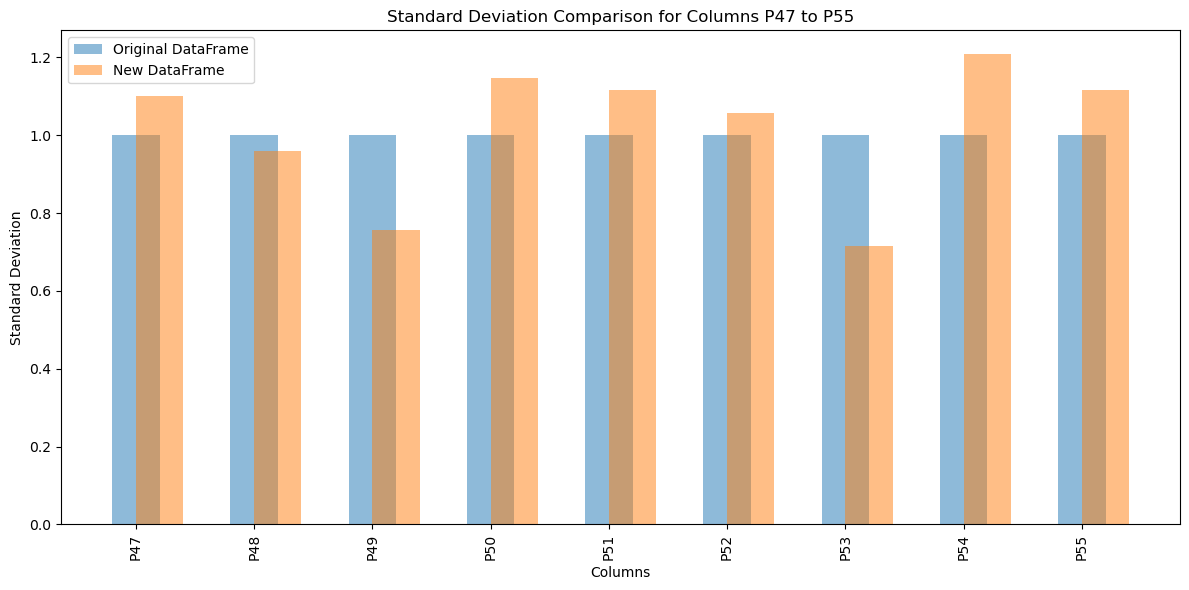

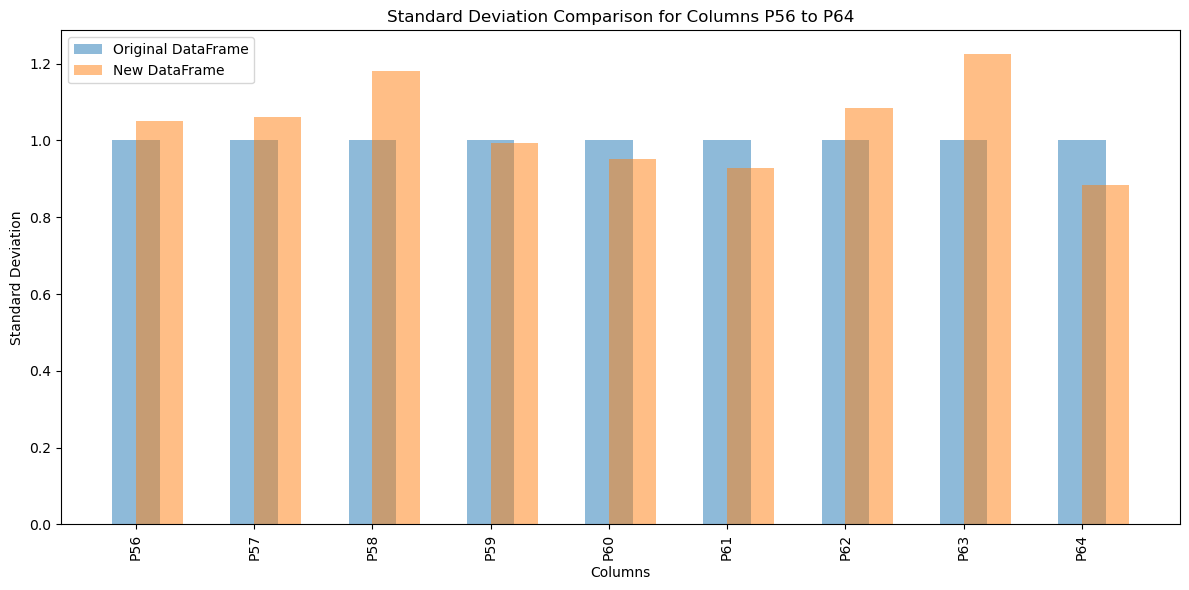

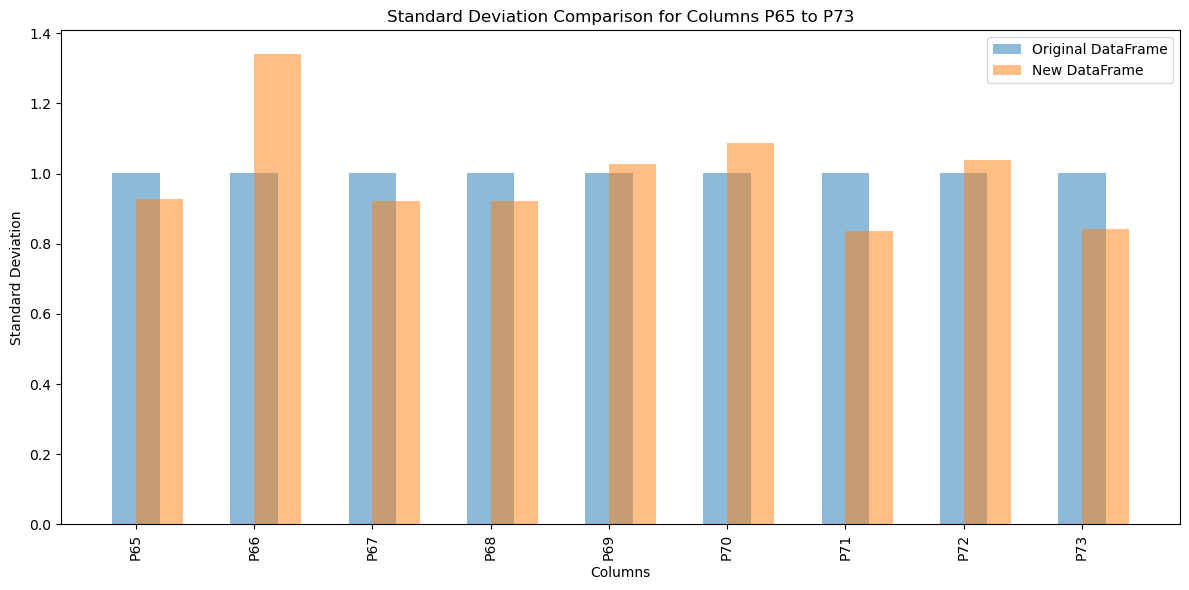

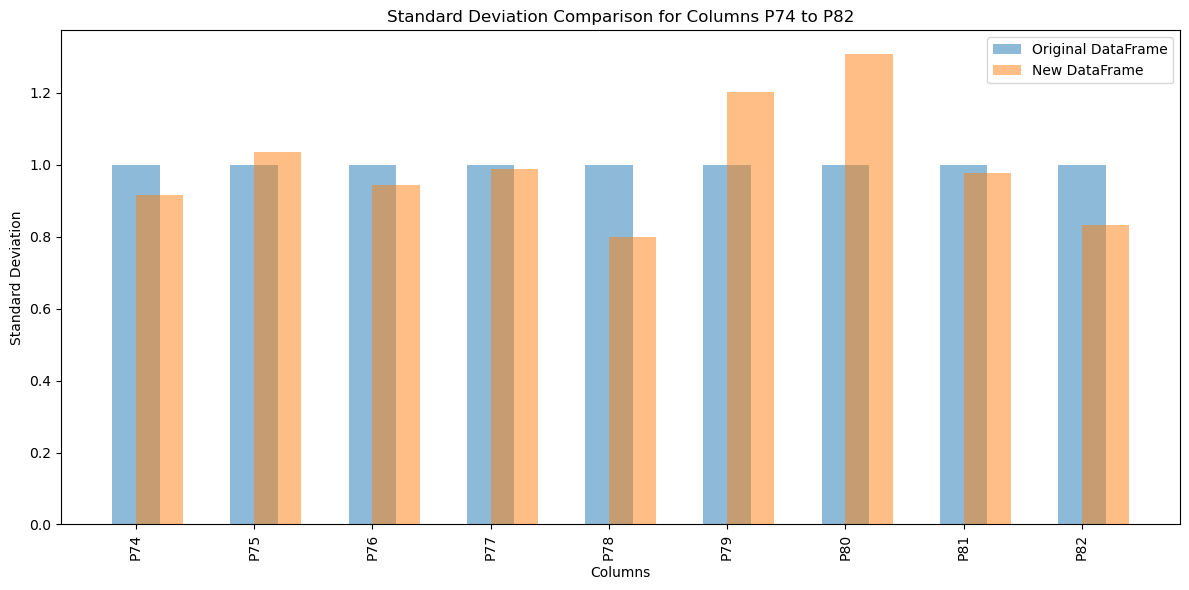

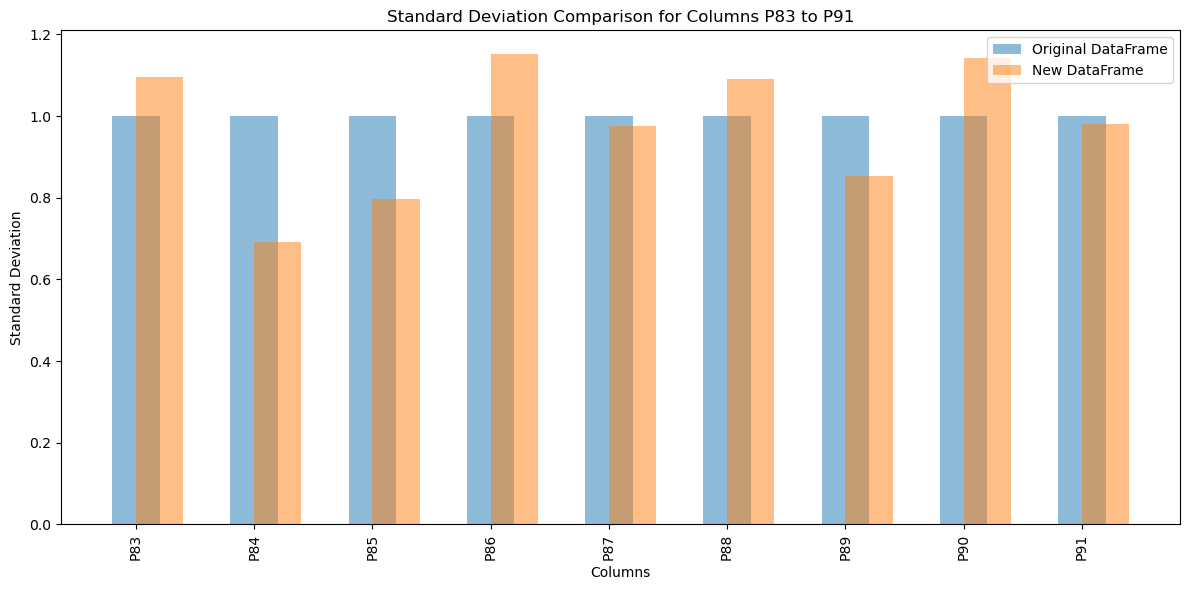

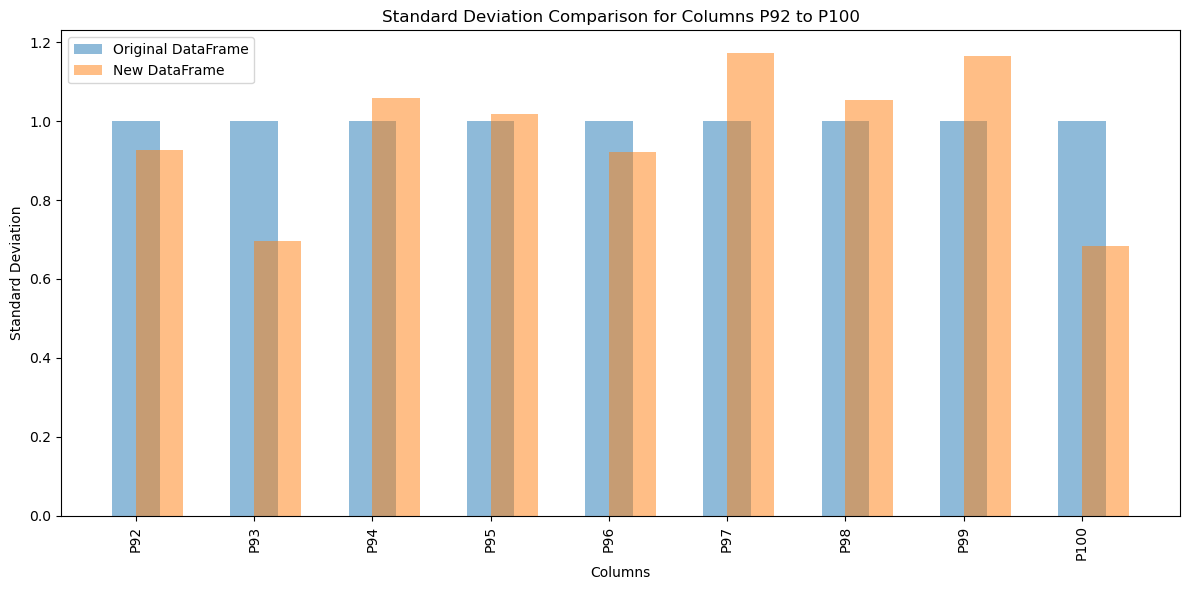

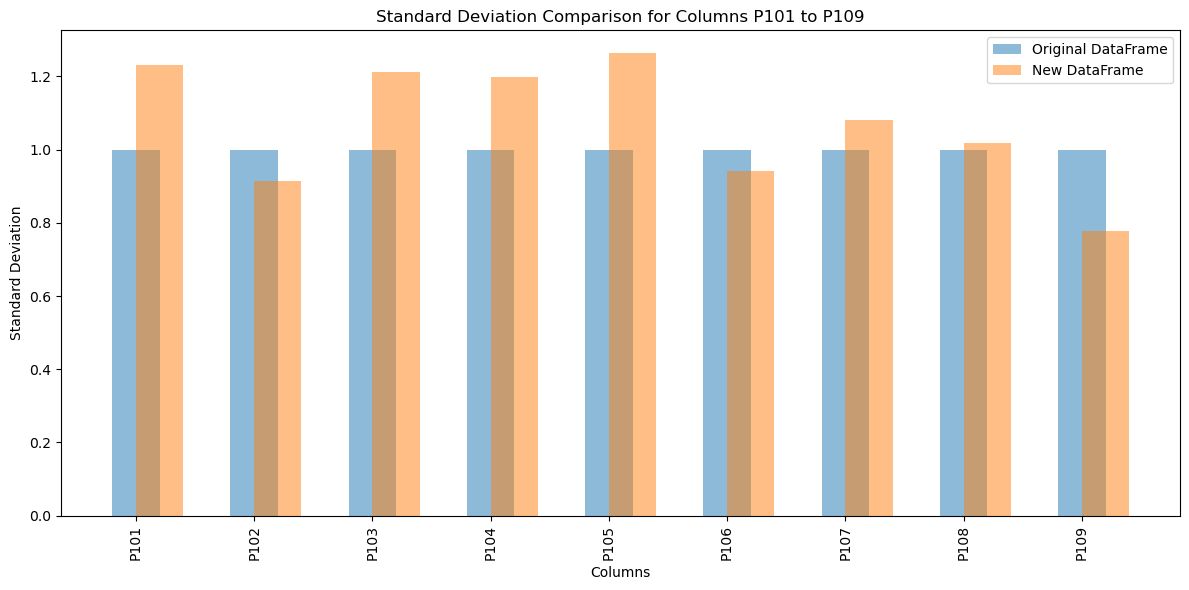

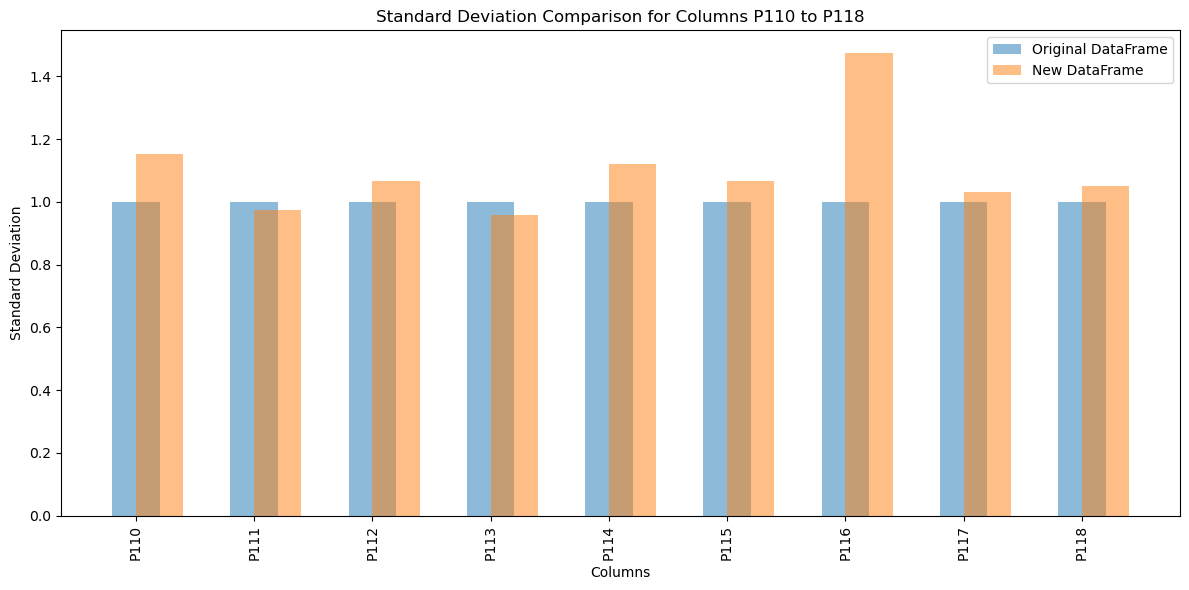

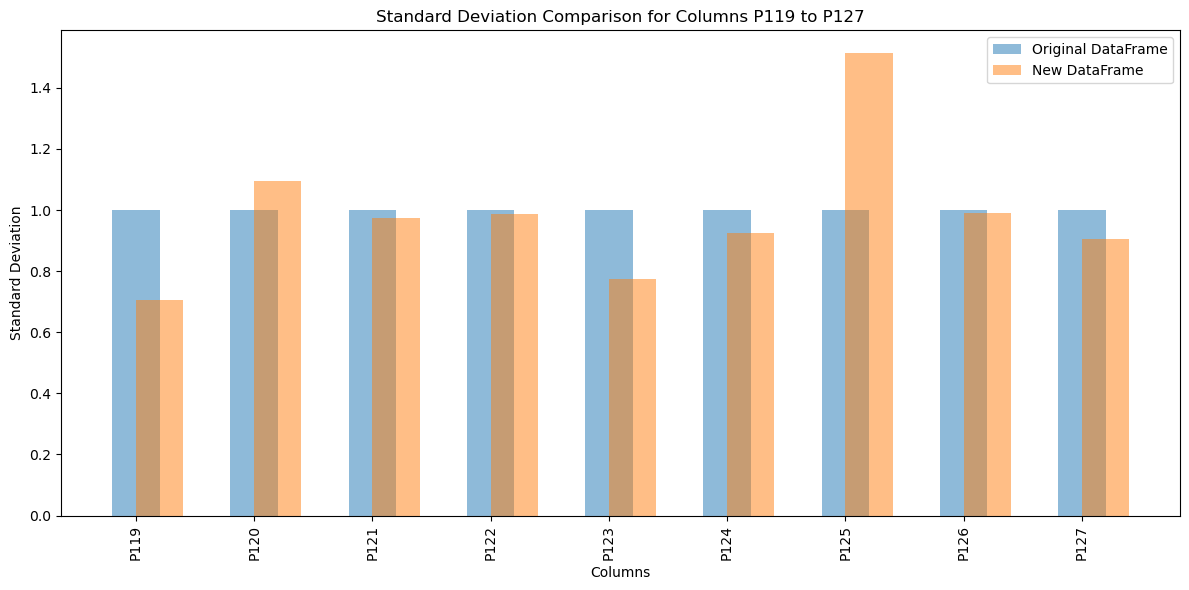

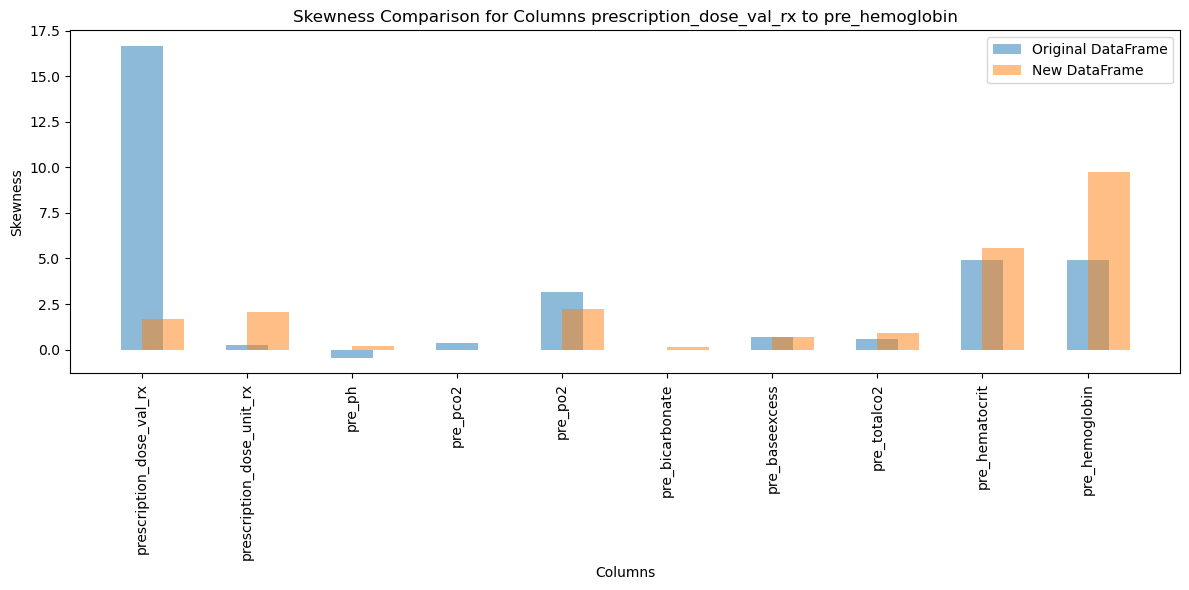

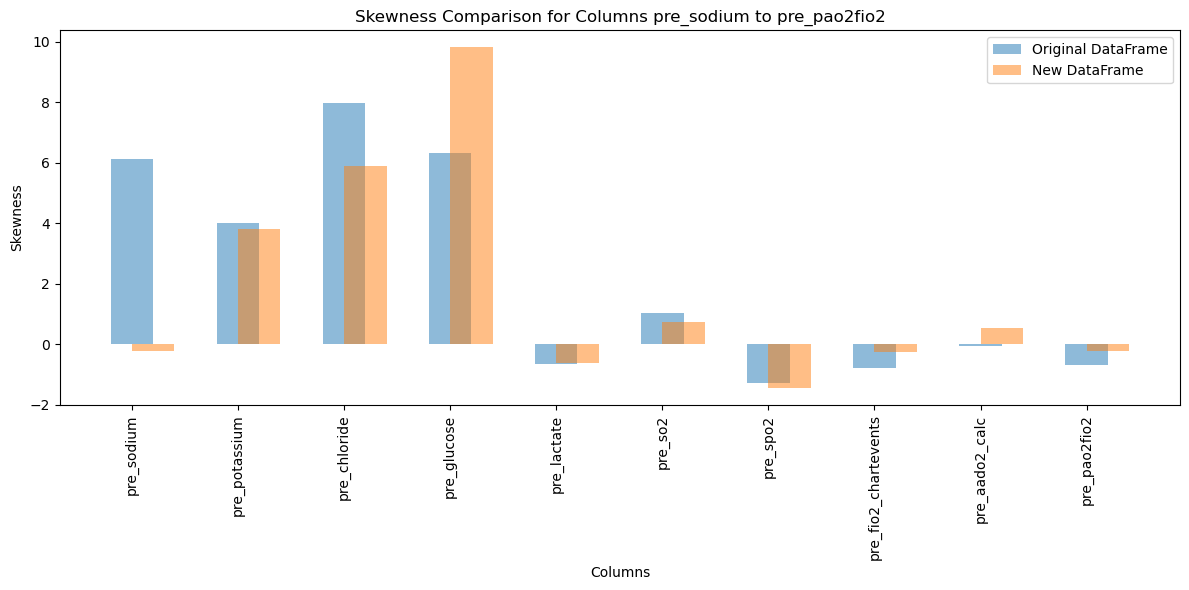

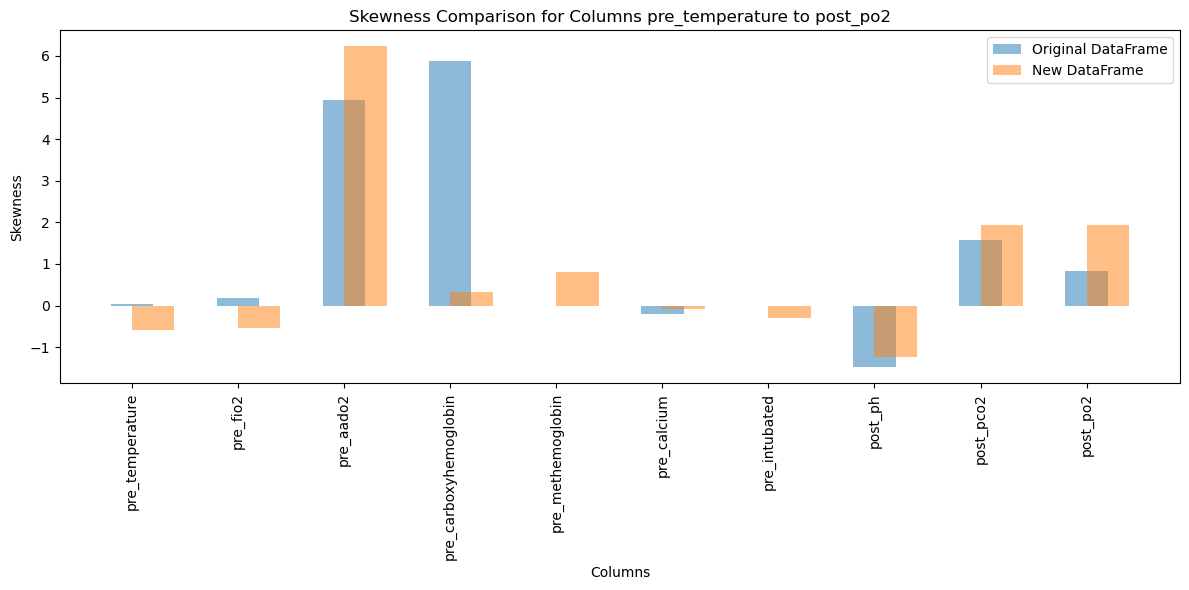

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:68                                                                                   │
│                                                                                                  │
│   65 plot_chunked_graphs(calculate_std, "Standard Deviation", df, df_synthetic, columns, chun    │
│   66                                                                                             │
│   67 # 4. Plot chunked graphs for Skewness Comparison                                            │
│ ❱ 68 plot_chunked_graphs(calculate_skewness, "Skewness", df, df_synthetic, columns, chunk_siz    │
│   69                                                                                             │
│   70 # 5. Plot chunked graphs for Kurtosis Comparison                                            │
│   71 plot_chunked_graphs(calculate_kurtosis, "Kurtosis", df, df_synthetic, columns, chunk_siz    │
│                                                                                                  │
│ in plot_chunked_graphs:49                                                                        │
│                                                                                                  │
│   46 │   │   plt.xticks(rotation=90)                                                             │
│   47 │   │   plt.legend()                                                                        │
│   48 │   │   plt.tight_layout()                                                                  │
│ ❱ 49 │   │   plt.show()                                                                          │
│   50                                                                                             │
│   51 # Perform the statistical analysis                                                          │
│   52 mean_df, mean_new_df = calculate_mean(df, df_synthetic)                                     │
│                                                                                                  │
│ /opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/matplotlib/pyplot.py:614 in show         │
│                                                                                                  │
│    611 │   explicitly there.                                                                     │
│    612 │   """                                                                                   │
│    613 │   _warn_if_gui_out_of_main_thread()                                                     │
│ ❱  614 │   return _get_backend_mod().show(*args, **kwargs)                                       │
│    615                                                                                           │
│    616                                                                                           │
│    617 def isinteractive() -> bool:                                                              │
│                                                                                                  │
│ /opt/anaconda3/envs/bb_dev/lib/python3.12/site-packages/matplotlib_inline/backend_inline.py:90   │
│ in show                                                                                          │
│                                                                                                  │
│    87 │   │   close = InlineBackend.instance().close_figures                                     │
│    88 │   try:                                                                                   │
│    89 │   │   for figure_manager in Gcf.get_all_fig_managers():                                  │
│ ❱  90 │   │   │   display(                                                                       │
│    91 │   │   │   │   figure_manager.canvas.figure,                                              │
│    92 │   │   │   │   metadata=_fetch_figure_metadata(figur

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, chi2_contingency
import numpy as np

# Define the chunk size (e.g., 10 columns per graph)
chunk_size = 10
columns = df.columns  # List of columns to plot

# Function to calculate mean
def calculate_mean(df1, df2):
    return df1.mean(), df2.mean()

# Function to calculate median
def calculate_median(df1, df2):
    return df1.median(), df2.median()

# Function to calculate standard deviation
def calculate_std(df1, df2):
    return df1.std(), df2.std()

# Function to calculate skewness
def calculate_skewness(df1, df2):
    return df1.apply(lambda x: skew(x, nan_policy='omit')), df2.apply(lambda x: skew(x, nan_policy='omit'))

# Function to calculate kurtosis
def calculate_kurtosis(df1, df2):
    return df1.apply(lambda x: kurtosis(x, nan_policy='omit')), df2.apply(lambda x: kurtosis(x, nan_policy='omit'))

# Function to create chunked plots for statistical analysis
def plot_chunked_graphs(stat_func, stat_label, df1, df2, columns, chunk_size=10):
    # Split the columns into chunks
    column_chunks = np.array_split(columns, len(columns) // chunk_size + 1)
    
    for idx, chunk in enumerate(column_chunks):
        # Get the statistics for this chunk of columns
        stat_df1, stat_df2 = stat_func(df1[chunk], df2[chunk])
        
        # Plot the bar charts for this chunk
        plt.figure(figsize=(12, 6))
        plt.bar(stat_df1.index, stat_df1.values, alpha=0.5, label="Original DataFrame", width=0.4, align='center')
        plt.bar(stat_df2.index, stat_df2.values, alpha=0.5, label="New DataFrame", width=0.4, align='edge')
        plt.title(f"{stat_label} Comparison for Columns {chunk[0]} to {chunk[-1]}")
        plt.xlabel("Columns")
        plt.ylabel(stat_label)
        plt.xticks(rotation=90)
        plt.legend()
        plt.tight_layout()
        plt.show()

# Perform the statistical analysis
mean_df, mean_new_df = calculate_mean(df, df_synthetic)
median_df, median_new_df = calculate_median(df, df_synthetic)
std_df, std_new_df = calculate_std(df, df_synthetic)
skew_df, skew_new_df = calculate_skewness(df, df_synthetic)
kurt_df, kurt_new_df = calculate_kurtosis(df, df_synthetic)

# 1. Plot chunked graphs for Mean Comparison
plot_chunked_graphs(calculate_mean, "Mean", df, df_synthetic, columns, chunk_size)

# 2. Plot chunked graphs for Median Comparison
plot_chunked_graphs(calculate_median, "Median", df, df_synthetic, columns, chunk_size)

# 3. Plot chunked graphs for Standard Deviation Comparison
plot_chunked_graphs(calculate_std, "Standard Deviation", df, df_synthetic, columns, chunk_size)

# 4. Plot chunked graphs for Skewness Comparison
plot_chunked_graphs(calculate_skewness, "Skewness", df, df_synthetic, columns, chunk_size)

# 5. Plot chunked graphs for Kurtosis Comparison
plot_chunked_graphs(calculate_kurtosis, "Kurtosis", df, df_synthetic, columns, chunk_size)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, chi2_contingency
import numpy as np

# Define the chunk size (e.g., 10 columns per graph)
chunk_size = 10
columns = df.columns  # List of columns to plot

# Function to calculate mean
def calculate_mean(df1, df2):
    return df1.mean(), df2.mean()

# Function to calculate median
def calculate_median(df1, df2):
    return df1.median(), df2.median()

# Function to calculate standard deviation
def calculate_std(df1, df2):
    return df1.std(), df2.std()

# Function to calculate skewness
def calculate_skewness(df1, df2):
    return df1.apply(lambda x: skew(x, nan_policy='omit')), df2.apply(lambda x: skew(x, nan_policy='omit'))

# Function to calculate kurtosis
def calculate_kurtosis(df1, df2):
    return df1.apply(lambda x: kurtosis(x, nan_policy='omit')), df2.apply(lambda x: kurtosis(x, nan_policy='omit'))

# Function to create chunked plots for error difference only if error exists
def plot_error_difference(stat_func, stat_label, df1, df2, columns, chunk_size=10):
    # Split the columns into chunks
    column_chunks = np.array_split(columns, len(columns) // chunk_size + 1)
    
    for idx, chunk in enumerate(column_chunks):
        # Get the statistics for this chunk of columns
        stat_df1, stat_df2 = stat_func(df1[chunk], df2[chunk])
        
        # Calculate the error difference (absolute difference)
        error_diff = abs(stat_df1 - stat_df2)
        
        # Filter columns where error exists (error > 0)
        non_zero_error_columns = error_diff[error_diff > 0]

        if not non_zero_error_columns.empty:
            # Plot the bar charts for the error difference
            plt.figure(figsize=(12, 6))
            plt.bar(non_zero_error_columns.index, non_zero_error_columns.values, alpha=0.7, color='red')
            plt.title(f"{stat_label} Error Difference for Columns {chunk[0]} to {chunk[-1]}")
            plt.xlabel("Columns")
            plt.ylabel(f"{stat_label} Error Difference")
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()

# Perform the statistical analysis
mean_df, mean_synthetic_df = calculate_mean(df, df_synthetic)
median_df, median_synthetic_df = calculate_median(df, df_synthetic)
std_df, std_synthetic_df = calculate_std(df, df_synthetic)
skew_df, skew_synthetic_df = calculate_skewness(df, df_synthetic)
kurt_df, kurt_synthetic_df = calculate_kurtosis(df, df_synthetic)

# 1. Plot error difference for Mean Comparison
plot_error_difference(calculate_mean, "Mean", df, df_synthetic, columns, chunk_size)

# 2. Plot error difference for Median Comparison
plot_error_difference(calculate_median, "Median", df, df_synthetic, columns, chunk_size)

# 3. Plot error difference for Standard Deviation Comparison
plot_error_difference(calculate_std, "Standard Deviation", df, df_synthetic, columns, chunk_size)

# 4. Plot error difference for Skewness Comparison
plot_error_difference(calculate_skewness, "Skewness", df, df_synthetic, columns, chunk_size)

# 5. Plot error difference for Kurtosis Comparison
plot_error_difference(calculate_kurtosis, "Kurtosis", df, df_synthetic, columns, chunk_size)

In [ ]:
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import run_diagnostic

def run_diagnostic_numerical_categorical(real_data, synthetic_data):
    """
    Runs diagnostic on all columns of real and synthetic data, assuming numerical or categorical.

    Args:
        real_data (pd.DataFrame): The real data.
        synthetic_data (pd.DataFrame): The synthetic data.

    Returns:
        The diagnostic results.
    """

    metadata = SingleTableMetadata()

    for col in real_data.columns:
        if pd.api.types.is_numeric_dtype(real_data[col]):
            metadata.add_column(column_name=col, sdtype='numerical')
        else:
            metadata.add_column(column_name=col, sdtype='categorical')

    diagnostic = run_diagnostic(
        real_data=real_data,
        synthetic_data=synthetic_data,
        metadata=metadata
    )

    return diagnostic


diagnostic_results = run_diagnostic_numerical_categorical(df, df_synthetic)
print(diagnostic_results)

In [ ]:
from sdv.evaluation.single_table import evaluate_quality
from sdv.metadata import SingleTableMetadata
import pandas as pd

def evaluate_synthetic_data_quality(real_data, synthetic_data):
    """
    Evaluates the quality of synthetic data compared to real data.

    Args:
        real_data (pd.DataFrame): The real data.
        synthetic_data (pd.DataFrame): The synthetic data.

    Returns:
        The quality report from sdv.evaluate_quality.
    """

    metadata = SingleTableMetadata()

    for col in real_data.columns:
        if pd.api.types.is_numeric_dtype(real_data[col]):
            metadata.add_column(column_name=col, sdtype='numerical')
        else:
            metadata.add_column(column_name=col, sdtype='categorical')

    quality_report = evaluate_quality(
        real_data,
        synthetic_data,
        metadata
    )

    return quality_report

quality_report = evaluate_synthetic_data_quality(df, df_synthetic)
print(quality_report)

In [ ]:
quality_report.get_details('Column Shapes')

## The cell below opens 180 tabs

In [ ]:
'''from sdv.evaluation.single_table import get_column_plot
from sdv.metadata import SingleTableMetadata
import pandas as pd
import plotly.io as pio  # For controlling plotly rendering

# Ensure plotly renders in your environment (uncomment if in a Jupyter notebook)
# pio.renderers.default = "notebook"

def plot_column_chunks(real_data, synthetic_data, chunk_size=10, figsize=(10, 6)):
    # Initialize the metadata object for the real_data
    metadata = SingleTableMetadata()

    # Add each column in the real data to metadata
    for col in real_data.columns:
        if pd.api.types.is_numeric_dtype(real_data[col]):
            metadata.add_column(column_name=col, sdtype='numerical')
        else:
            metadata.add_column(column_name=col, sdtype='categorical')

    # Get the list of column names
    columns = real_data.columns.tolist()

    # Iterate through the columns in chunks
    for i in range(0, len(columns), chunk_size):
        chunk = columns[i:i + chunk_size]
        print(f"Plotting columns: {chunk}")

        # Plot each column in the current chunk
        for col in chunk:
            # If either the real or synthetic data has only one unique value, we use a bar plot
            if real_data[col].nunique() == 1 or synthetic_data[col].nunique() == 1:
                fig = get_column_plot(
                    real_data=real_data,
                    synthetic_data=synthetic_data,
                    column_name=col,
                    metadata=metadata,
                    plot_type='bar'  # Specify bar plot type for columns with one unique value
                )
            else:
                # For other columns, use the default plot type
                fig = get_column_plot(
                    real_data=real_data,
                    synthetic_data=synthetic_data,
                    column_name=col,
                    metadata=metadata
                )

            # Adjust the figure size for plotly
            fig.update_layout(
                width=figsize[0] * 100,  # Width in pixels
                height=figsize[1] * 100  # Height in pixels
            )

            # Show the figure with renderer option
            fig.show(renderer="browser")  # This should open the plot in your default web browser

# Example usage (assuming df and df_synthetic are your dataframes):
plot_column_chunks(df, df_synthetic, figsize=(8, 4))  # Example figsize (width, height)'
'''

In [ ]:
def compute_statistics(real_data, synthetic_data):
    # Initialize dictionaries to store results
    mean_differences = {}
    real_means = {}
    synthetic_means = {}

    # Iterate through columns
    for col in real_data.columns:
        try:
            # Only calculate statistics for numerical columns
            if pd.api.types.is_numeric_dtype(real_data[col]):
                real_mean = real_data[col].mean()
                synthetic_mean = synthetic_data[col].mean()

                real_means[col] = real_mean  # Store mean of real data
                synthetic_means[col] = synthetic_mean  # Store mean of synthetic data
                mean_differences[col] = abs(real_mean - synthetic_mean)  # Store absolute mean difference

        except Exception as e:
            print(f"Error processing column {col}: {e}")

    # Create DataFrames for the results
    mean_diff_df = pd.DataFrame(list(mean_differences.items()), columns=['Column', 'Mean Difference'])
    avg_values_df = pd.DataFrame({'Column': list(real_means.keys()), 
                                  'Real Data Mean': list(real_means.values()), 
                                  'Synthetic Data Mean': list(synthetic_means.values())})

    return mean_diff_df, avg_values_df

mean_diff_df, avg_values_df = compute_statistics(df, df_synthetic)

# Print the tables
print("\n🔹 Mean Differences Between Real & Synthetic Data:")
print(mean_diff_df)

print("\n🔹 Average Values in Real & Synthetic Data:")
print(avg_values_df)

In [ ]:
# Define real and synthetic data
real_data = df
synthetic_data = df_synthetic

# Prepare a list to store results
results = []

# Iterate through all numerical columns
for column in real_data.select_dtypes(include=['number']).columns:
    real_mean = real_data[column].mean()
    synthetic_mean = synthetic_data[column].mean()
    abs_difference = abs(real_mean - synthetic_mean)
    
    # Calculate a simple distribution difference using KL Divergence (if possible)
    distribution_diff = abs(real_data[column].std() - synthetic_data[column].std())  

    # Append results
    results.append([column, real_mean, synthetic_mean, abs_difference, distribution_diff])

# Convert results to a DataFrame
summary_df = pd.DataFrame(
    results, columns=['Column', 'Real Mean', 'Synthetic Mean', 'Abs Difference', 'Distribution Difference']
)

# Format numbers to avoid scientific notation
summary_df[['Real Mean', 'Synthetic Mean', 'Abs Difference', 'Distribution Difference']] = summary_df[
    ['Real Mean', 'Synthetic Mean', 'Abs Difference', 'Distribution Difference']
].applymap(lambda x: f"{x:,.6f}")

# Display the table
print(summary_df.to_string(index=False))


In [ ]:
'''import argparse
import os
import pandas as pd
import numpy as np
import joblib
from ctgan import CTGAN

parser = argparse.ArgumentParser()
parser.add_argument('--batch-size', type=int, default=500)
parser.add_argument('--output-data-dir', type=str, default=os.environ.get('SM_OUTPUT_DATA_DIR', './output'))
parser.add_argument('--model-dir', type=str, default=os.environ.get('SM_MODEL_DIR', './model'))
parser.add_argument('--train', type=str, default=os.environ.get('SM_CHANNEL_TRAIN', ''))

args, unknown = parser.parse_known_args()

print(f"Args: {args}")

train_file = os.path.join(args.train, 'blood.csv')
print(f"Reading training data from: {train_file}")

data = pd.read_csv(train_file)
data = data.fillna(0)

max_epochs = 5000  # Max limit for training
epoch_step = 250  # Increase epochs in steps of 100
last_successful_epoch = 4600

for epoch in range(4600, max_epochs + 1, epoch_step):
    try:
        print(f"\nTrying to train CTGAN with {epoch} epochs...")

        model = CTGAN(
            epochs=epoch,
            batch_size=args.batch_size,
            verbose=True
        )

        model.fit(data)
        print(f"✅ Training successful at {epoch} epochs.")
        
        last_successful_epoch = epoch  # Update last successful epoch

    except Exception as e:
        print(f"\n❌ CTGAN failed at {epoch} epochs.")
        print(f"Error: {str(e)}")
        break  # Stop when failure occurs

# Train one last time with the last working epoch value
print(f"\nRetraining with last successful epoch value: {last_successful_epoch}")

model = CTGAN(
    epochs=last_successful_epoch,
    batch_size=args.batch_size,
    verbose=True
)
model.fit(data)
print("Final training completed.")

synthetic_data = model.sample(100)

print("Synthetic data sample:")
print(synthetic_data.head())

os.makedirs(args.output_data_dir, exist_ok=True)

output_file = os.path.join(args.output_data_dir, 'synthetic_data_error_fixing.csv')
synthetic_data.to_csv(output_file, index=False)
print(f"Synthetic data saved to: {output_file}")'''